<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr1/blob/Vyimov-Zorislav-folder/Vyimov%20Zorislav/ZorislavVyymov_Internship_4%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Блокнот по Стажировке по задаче "Оценка кадидатов по резюме".**

## Текущие непонятки

### **По задаче Заказчика**

#### Ранее снятые вопросы

1. Верно ли: НС должна угадывать предпочтения Заказчика к соискателям по совокупности данных в тех резюме, которые он пометил как "Да" (подходит)? Применимо ко всем позициям (должностям) соискателей в датасете?

Ответ: да

2. По ТЗ требуется оценить степень приемлемости кандидатов для компании, но разве для этого эта степень не должна входить в разметку датасета? Сейчас ее нет - откуда брать? Или эта степень будет выражаться вероятностью результата «подходит»?

Ответ: Нет, не должна. Да, степенью вероятности ответа да /нет

3. Верно ли, что те резюме, которые Заказчик никак не разметил (Поле "Подходит да/нет") никак нельзя использовать в обучении и их придется просто удалить из дататсета?

Ответ: верно, для обучения бесполезны.

#### Оставшиеся вопросы

1. Какова гарантия того, что Заказчик не изменит свои критерии оценки резюме со временем: при разметке руководствовался одними, при оценке нейронке и подготовки тестовых данных  - другими?  Не правильнее сразу выделить тестовые данные из размеченных Заказчиком (как только получим их) и сохранить их для оценки по готовности НС?

2. Пока не очень ясно, как обеспечить дообучаемость модели. Видимо, с заказчиком необходимо оговорить формат поставляемых им новых данных в будущем, с тем, чтобы автоматически производить их предобработку для подачи в НС с уже используемыми данными. Соответственно, стоит сразу выстраивать автопредобработку данных, применяемой к новым данным. Текущий дататсет можно взять за основу, если только Заказчик не намерен изменить его формат в будущем. Или получить от заказчика форму датасета в будущем. Если у заказчика нет какого то внятного видения этого будущего представления, возможно лучшим вариантом было бы предложить ему ту форму, которую он обязуется соблюдать при подготовке новых данных и которая максимально соответствовала бы решению задачи. Тогда автопредобработку надо выстраивать именно этого формата.

### **По ходу решения**




#### Ранее решенные

1. ошибка при сборке вектора из обработанных данных с помощью отдельных функций для каждого поля

Решено: выявлена неверная индексация столбцов названиями полей для использования в коде. Исправлено

2. ошибки в работе функций парсинга данных (не все варианты обрабатываются).

Решено: Исправлено.

3. Упустил категоризировать поле "целевая позиция" и включить в итоговый вектор.

Решено:  В набор предобработки включены соответствующие функции парсинга, в двух вариантах. Дополнены функции сборки даных в итоговый вектор для подачи в НС.

4. Составная неросеть.

Решено: За основу взят код составной НС из практического ноутбука курса по теме. Адаптировано к исходному дататсету. Модель обучается, но плохо

5. Проблема переобучения составной модели.

Решено: Применено oversampling для балансировки выборки. Применены колбэки для составной модели. Визуализация показывает нормальное обучпение на сорректированном датасете.


#### Не решенные

1. Подобрать оптимальные сетки и гиперпараметры НС:
 - использовать эксперименты?
 - использовать Auto ML?
 Применил Автокерас для подбора НС для обработки простых табличных дангнных, Получил НС с потенциально хорошими характеристиками, но в составную НС не вставил и результат не проверил.

 2. Реализовать колонку из ТЗ "оценка резюме"  (подходит % / не подходит %). Код составлен и добавлен в ноутбук исходя из предположения о наличии тестового датасета в файле определенного названия. Но проверки работоспособности кода не было - нет тестового ДС.
 Надо сэмулировать тестовый дататсет на неразмеченных данных от Заказчика, подготовить данные для обработки и проверить результат на эмуляторе.

## Сборник необходимых для работы библиотек.

In [ ]:
# импортируем keras
from tensorflow import keras
from tensorflow.keras import layers

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизатор
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Для подключения Гугл-диска
from google.colab import drive

# Работа со временем
import time

# Чтоб рисовать в колабе:
%matplotlib inline

from tensorflow.keras.preprocessing.sequence import pad_sequences #

# подключаем колбэки
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split # Для разбивки на выборки
from sklearn.metrics import mean_squared_error, mean_absolute_error #

#from google.colab import files #  Для загрузки своей картинки

import random #Для генерации случайных чисел
import math # Для округления

# Запись в файлы и чтение из файлов структур данных Python
# import pickle

#import os #Для работы с файлами

# Регулярные выражения
import re

from IPython.display import clear_output

from imblearn.over_sampling import RandomOverSampler


## Исходные данные. Анализ

### Исследование Датасета

Скачаем базу для работы:

In [ ]:
# Загрузим как файл .xlsx
data = pd.read_excel('ДатаСет Оценка резюме 581 резюме_без пуст.xlsx')
data

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,2022-12-05 00:00:00,Царева Резида Юнировна,"Женщина, 33 года, родилась 21 апреля 1989",45 000 руб.,HR-специалист,"Уфа, Не готова к переезду, готова к редким ком...",полная занятость,"полный день, удаленная работа",Опыт работы —14 лет 1 месяц,Сбербанк,Старший менеджер по обслуживанию,"Высшее, 2013, Башкирский государственный униве...",4 марта 2023 в 19:58,нет
496,496,2023-02-08 00:00:00,Чёрная Соня,"Женщина, 21 год, родилась 8 марта 2002",30 000 руб.,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,"полный день, сменный график",Опыт работы —2 года 11 месяцев,Семейный доктор,Администратор,"Среднее специальное, 2021, Угктид",9 февраля 2023 в 10:08,нет
497,497,2023-02-03 00:00:00,Чуфарова Анастасия,"Женщина, 24 года, родилась 6 апреля 1998",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —2 года 4 месяца,"Газпромбанк, ОАО",Специалист CRM-продаж,"Высшее, 2022, Уфимский государственный нефтяно...",17 января 2023 в 10:27,нет
498,498,2022-12-13 00:00:00,Шамсутдинова Айгуль Хуснулловна,"Женщина, 35 лет, родилась 28 декабря 1987",не указана,HR-специалист,"Уфа, Готова к переезду, готова к командировкам",полная занятость,полный день,Опыт работы —12 лет 2 месяца,"ООО ""Кардио-неврологический центр""",Администратор,"Высшее, 2016, ГБОУ ВО ""Башкирская академия гос...",16 декабря 2022 в 11:39,нет


Данные загружены и по нумерации строк видно, что фактически данных меньше: в XLS легко определить, что нет строк 541-543.
Посмотрим на данные, с которыми нам предстоит работать:

In [ ]:
# Вывод количества резюме и числа признаков
print(data.shape)

data.head(3)

(500, 15)


,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       500 non-null    int64 
 1   Дата отклика                     500 non-null    object
 2   ФИО                              500 non-null    object
 3   Пол, возраст                     500 non-null    object
 4   ЗП                               500 non-null    object
 5   Ищет работу на должность         500 non-null    object
 6   Город                            500 non-null    object
 7   Занятость                        500 non-null    object
 8   График                           500 non-null    object
 9   Опыт ()                          500 non-null    object
 10  Последнее/нынешное место работы  500 non-null    object
 11  Последняя/нынешняя должность     500 non-null    object
 12  Образование и ВУЗ                500

Выводы:
1. Целевой столбец не содержит данных для 79 записей.  Это вопрос к заказчику (их предоставление)
2. К удалению из ДФ как бесполезные данные для обучения: столбцы 0,1,2,10,13
3. Кажется целесообразным разбить данные S3 на отдельные признаки: "Пол" и "Возраст"
4. Кажется целесообразным разбить данные S12 на отдельные признаки "Образование" и "ВУЗ"

In [ ]:
# посмотрим на единственный цифровой столбец S0:
data.describe()

,Unnamed: 0
count,500.000000
mean,249.500000
std,144.481833
min,0.000000
25%,124.750000
50%,249.500000
75%,374.250000
max,499.000000


Сквозная нумерация строк отличается от нумерации в поле S0. Не хватает 3 строк. Предлагаю удалить этот столбец из DF data

In [ ]:
data.describe(include=['O'])

,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
count,500,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,82,437,381,42,8,182,18,28,239,415,314,420,470,2
top,2023-02-22 00:00:00,ФИО скрыто соискателем,Женщина,не указана,Growth Product Manager,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —6 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product manager,Среднее образование,16 февраля 2023 в 18:09,нет
freq,42,5,40,249,184,66,300,179,9,12,33,15,3,489


In [ ]:
# посмотрим на столбец "Пол, возраст"
data["Пол, возраст"].value_counts()


Женщина                                       40
Мужчина                                       27
Мужчина, 28 лет, родился 16 августа 1994       4
Мужчина, 28 лет, родился 18 октября 1994       3
Мужчина, 24 года, родился 3 августа 1998       3
                                              ..
Мужчина, 20 лет, родился 10 июня 2002          1
Мужчина, 31 год, родился 10 марта 1991         1
Женщина, 37 лет, родилась 24 мая 1985          1
Мужчина, 32 года, родился 21 мая 1990          1
Женщина, 23 года, родилась 23 октября 1999     1
Name: Пол, возраст, Length: 381, dtype: int64

выводы:
1. пол соискателя - обычно значимая информация для работодателя. нужно выводить в самостоятельный атрибут.
2. возраст соискателя - обычно значимая информация для работодателя, но в данном ДС она неполна для 76 записей. Нужно попытаться выделить ее в самостоятельный атрибут (int) и категоризировать, согласовать с Заказчиком категории. В отношении пустых значений предлагаемого нового атрибута "возраст" предлагаю заместить значением "нет данных". При категоризации это значение приравнять к 0, включив его, таким образом в первую категорию (0-17 лет)
3. дата рождения соискателя -  обычно не значимая при подборе информация и в данном случае не поможет восполнить недостающие значения атрибута "возраст". Но при устаревшем ДС она может дать более корректные знасения возраста (текущий год минус год рождения). К тому же, проще парсить четыре подряд идущих числовых символа - наверняка год. Дата и месяц рождения не интересны. По согласованию с Заказчиком предлагаю игнорить эти данные при обучении. Использовать только возраст.

In [ ]:
# Доля пустых значений в полях:
data.isna().sum() / data.shape[0]

Unnamed: 0                         0.0
Дата отклика                       0.0
ФИО                                0.0
Пол, возраст                       0.0
ЗП                                 0.0
Ищет работу на должность           0.0
Город                              0.0
Занятость                          0.0
График                             0.0
Опыт ()                            0.0
Последнее/нынешное место работы    0.0
Последняя/нынешняя должность       0.0
Образование и ВУЗ                  0.0
Обновление резюме                  0.0
Подходит - да/нет                  0.0
dtype: float64

Новой информации это не дало. Разметка Датасета (заполненение подходит/не подходит) является обязательством заказчика - эти данные надо истребовать и перевести в булеву величину.



In [ ]:
# посмотрим на столбец "ЗП"
data["ЗП"].value_counts()

не указана       249
50 000 руб.       26
40 000 руб.       23
100 000 руб.      20
70 000 руб.       20
30 000 руб.       19
35 000 руб.       18
150 000 руб.      17
60 000 руб.       17
80 000 руб.       13
120 000 руб.      12
45 000 руб.        7
200 000 руб.       6
90 000 руб.        5
75 000 руб         5
180 000 руб.       4
20 000 руб.        3
85 000 руб.        3
110 000 руб.       3
95 000 руб.        2
280 000 руб.       2
130 000 руб.       2
55 000 руб.        2
65 000 руб.        2
25 000 руб.        2
1 550 USD          2
2 500 USD          1
3 500 USD          1
140 000 руб.       1
1 руб.             1
600 000 KZT        1
155 000 руб.       1
170 000 руб.       1
2 000 USD          1
1 900 000 KZT      1
160 000 руб.       1
127 000 руб.       1
1 200 EUR          1
119 000 руб.       1
350 000 руб.       1
4 000 USD          1
250 000 руб.       1
Name: ЗП, dtype: int64

In [ ]:
data["ЗП"].unique()

array(['90 000 руб.', 'не указана', '150 000 руб.', '120 000 руб.',
       '100 000 руб.', '30 000 руб.', '40 000 руб.', '70 000 руб.',
       '50 000 руб.', '140 000 руб.', '130 000 руб.', '80 000 руб.',
       '65 000 руб.', '95 000 руб.', '45 000 руб.', '60 000 руб.',
       '200 000 руб.', '1 900 000 KZT', '1 руб.', '250 000 руб.',
       '280 000 руб.', '110 000 руб.', '600 000 KZT', '1 550 USD',
       '1 200 EUR', '2 500 USD', '85 000 руб.', '4 000 USD',
       '350 000 руб.', '119 000 руб.', '180 000 руб.', '127 000 руб.',
       '160 000 руб.', '2 000 USD', '3 500 USD', '75 000 руб',
       '170 000 руб.', '155 000 руб.', '55 000 руб.', '35 000 руб.',
       '20 000 руб.', '25 000 руб.'], dtype=object)

Предложения:
1. перевести к единой валюту (руб) и только в числовые значения
2. Значения "1 руб" пусть преобразуется в 1
3. не указана преобразовать в число 0
4. категорировать значения по согласованию с Заказчиком.

In [ ]:
data["Город"].value_counts()

Уфа, Не готова к переезду, не готова к командировкам                                                                                                                       66
Уфа, Не готова к переезду, готова к редким командировкам                                                                                                                   30
Москва, Готов к переезду, готов к командировкам                                                                                                                            28
Уфа, Готова к переезду, готова к командировкам                                                                                                                             27
Уфа, Не готова к переезду, готова к командировкам                                                                                                                          25
                                                                                                                                  

Выводы:
1. предлагаю выделить в три отдельных атрибута:
 - до первой запятой: текстовый "Город"  и затем категоризировать: (город работодателя (Москва), Миллионники, Зарубеж, остальные)
 - от первой до посдедней запятой: булево "готов к переезду", где 1 принадлежит вариациям "готов к переезду" без конкретики ИЛИ
   "готов к переезду" + город/страна Работодателя;  0 == все остальное
 - после последней запятой: 3 категории "готов к командировкам": (нет, редкие, да)

In [ ]:
# рассмотрим содержимое колонки соискателя должности
data["Ищет работу на должность"].unique()

array(['Growth Product Manager',
       'Product manager в Growth Hacking команду',
       'Директор медицинской клиники', 'HR-специалист',
       'Product Manager в команду Финансового департамента',
       'Product Manager в команду HR', 'Project manager',
       'Product Marketing Manager в Growth Hacking команду'], dtype=object)

Вывод: не более 8 вариантов. Категоризировать.

In [ ]:
# рассмотрим содержимое колонки "Занятость"
data["Занятость"].unique()

array(['проектная работа, частичная занятость, полная занятость',
       'полная занятость',
       'стажировка, частичная занятость, полная занятость',
       'полная занятость, частичная занятость, проектная работа',
       'проектная работа, полная занятость',
       'проектная работа, стажировка, волонтерство, частичная занятость, полная занятость',
       'проектная работа, стажировка, частичная занятость, полная занятость',
       'частичная занятость, полная занятость',
       'проектная работа, стажировка, полная занятость',
       'стажировка, полная занятость', 'частичная занятость',
       'проектная работа, неполный рабочий день, полный рабочий день',
       'проектная работа, частичная занятость',
       'полная занятость, частичная занятость, проектная работа, стажировка',
       'проектная работа, волонтерство, частичная занятость, полная занятость',
       'полная занятость, проектная работа',
       'полная занятость, частичная занятость',
       'полная занятость, час

Вывод:
1. по согласованию с заказчиком исключить вариант "волонтерство", если он ему не интересен/оставить
2. неполный рабочий день == неполная занятость
3. полный рабочий день == полная занятость
4. ввести 4-5 категорий


In [ ]:
# рассмотрим содержимое колонки "График"
data["График"].unique()

array(['удаленная работа', 'удаленная работа, гибкий график, полный день',
       'полный день, гибкий график', 'полный день',
       'удаленная работа, полный день',
       'удаленная работа, гибкий график, полный день, сменный график',
       'вахтовый метод, удаленная работа, гибкий график, полный день, сменный график',
       'удаленная работа, полный день, сменный график',
       'полный день, сменный график', 'удаленная работа, гибкий график',
       'удаленная работа, полный рабочий день',
       'полный день, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, удаленная ',
       'удаленная работа, вахтовый метод',
       'полный день, сменный график, гибкий график',
       'полный день, гибкий график, удаленная работа',
       'полный день, сменный график, гибкий график, вахтовый метод',
       'полный день, гибкий график, удаленная работа, вахтовый метод',
       'полный день, сменный гр

Выводы:
Привести к категориям: вахта, смена, гибкий, полный, удаленка

In [ ]:
# рассмотрим содержимое колонки "Опыт"
data["Опыт ()"].unique()

array(['Опыт работы —5 лет 10 месяцев', 'Опыт работы —11 лет 11 месяцев',
       'Опыт работы —7 лет 2 месяца', 'Опыт работы —8 лет 10 месяцев',
       'Опыт работы —5 лет 9 месяцев', 'Опыт работы —5 лет 11 месяцев',
       'Опыт работы —13 лет 9 месяцев', 'Опыт работы —5 лет',
       'Опыт работы —10 лет 3 месяца', 'Опыт работы —4 года 4 месяца',
       'Опыт работы —13 лет 7 месяцев', 'Опыт работы —5 лет 1 месяц',
       'Опыт работы —16 лет 3 месяца', 'Опыт работы —19 лет 4 месяца',
       'Опыт работы —34 года 6 месяцев', 'Опыт работы —17 лет 6 месяцев',
       'Опыт работы —5 лет 7 месяцев', 'Опыт работы —22 года 3 месяца',
       'Опыт работы —31 год 8 месяцев', 'Опыт работы —23 года 8 месяцев',
       'Опыт работы —12 лет 8 месяцев', 'Опыт работы —23 года 5 месяцев',
       'Опыт работы —24 года 6 месяцев', 'Опыт работы —15 лет 11 месяцев',
       'Опыт работы —13 лет 5 месяцев', 'Опыт работы —19 лет 3 месяца',
       'Опыт работы —20 лет 3 месяца', 'Опыт работы —7 лет 10 месяце

Вывод:
1. на самом деле это  -  общий трудовой стаж соискателя
2. преобразовать к количеству мес (int)
3. Категоризировать. Категории согласовать с Заказчиком

In [ ]:
# рассмотрим содержимое колонки "Последняя/нынешняя должность"
data["Последняя/нынешняя должность"].unique()

array(['Менеджер по продукту',
       'Product owner трайб сбережения и инвестиции',
       'Директор по маркетингу и бренд-менеджер',
       'Product Manager (team leader)', 'Product/Project manager',
       'Начальник участка инъекционных препаратов', 'Контент-менеджер',
       'Учитель русского языка и литературы', 'Специалист',
       'Ведущий бизнес аналитик', 'Супервайзер отдела продаж',
       'Начальник отдела сопровождения Договоров', 'Бухгалтер',
       'Заместитель начальника управления по налоговому учету и отчетности',
       'Руководитель планово-экономического отдела',
       'Управляющий отделом персонала', 'Финансовый менеджер',
       'Контент-менеджер, продьюсер', 'Начальник отдела казначейства',
       'Главный\xa0 бухгалтер', 'Главный бухгалтер',
       'Финансовый руководитель', 'Главный экономист',
       'Финансовый директор\xa0',
       'Бухгалтер по расчету заработной платы и сдаче отчетности',
       'Агент по туризму', 'Руководитель инвестиционного отдела',


In [ ]:
data["Последняя/нынешняя должность"].nunique()

314

Вывод: почти нет повторений в этом атрибуте. Пока неясно что с этим можно сделать.

In [ ]:
data["Подходит - да/нет"].unique()

array(['да', 'нет'], dtype=object)

In [ ]:
data["Подходит - да/нет"].value_counts()

нет    489
да      11
Name: Подходит - да/нет, dtype: int64

Вывод: очень несбалансированный датасет

### Общий вывод и предложения по датасету

Этот дататсет какой то нерабочий. Только 11 подходящих Заказчику резюме из 571 вариантов, 79 из которых вообще не определены ни в какую из категорий.
Всего в данном Дататсете рассматривается 8 должностей, из которых Заказчик пометил как "да" только 4 варианта.

Приобразовывать имено этот Дататсет и готовить его для обучения кажется нет смысла, тем более что анонсирован другой Датасет. Целесообразно дождаться его, возможно он будет иного формата/содержанияи и качества разметки.

С этим же можно пока потренироваться в обработке, прикинуть что обсудить с Заказчиком.

0. **Индекс**               удалить
1. **Дата отклика**         удалить
2. **ФИО**                  удалить
3. **Пол, возраст**         разделить Пол (булево) и Возраст (кат)
4. **ЗП**                   привести к единой валюте в млн руб, ОНЕ (11)
5. **Ищет работу на должность** ОНЕ (8)
6. **Город**                OHE (4)
6.1. Готовность к переезду  булево, к "да" отнести "хочу" и "Готов" без конкретики или если указан город/страна Заказчика
6.2. Готовность к командировкам (OHE): да, нет , редко
7. **Занятость**            кат (4/5)
8. **График**               кат (5)
9. **Опыт**                 привести к мес (int), (кат)
10. **Последнее/нынешное место работы**   удалить
11. **Последняя/нынешняя должность**      удалить
12. **Образование и ВУЗ**   выделить: Образование  (кат)
12.1. ВУЗ (STR)
13. **Обновление резюме**   удалить
14. **Подходит**            кат(2)






## Подготовка исходных данных для обучения.

In [ ]:
# Загрузка исходного файла.xlsx
data = pd.read_excel('ДатаСет Оценка резюме 581 резюме_без пуст_перемеш.xlsx')

### Парсинг Датасета

#### Готовые (адаптипованы к датасету)

In [ ]:
#Убрать лишние столбцы

fixed_df = data.drop(data.columns[0],axis = 1)         # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df = fixed_df.drop(fixed_df.columns[0],axis = 1) # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df.shape)

fixed_df.head(3)


(500, 12)


,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,"Мужчина, 36 лет, родился 22 октября 1986",не указана,Product Manager в команду Финансового департам...,"Уфа, Не готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —13 лет 7 месяцев,"ООО ""Уральская мясная компания""",Ведущий бизнес аналитик,"Высшее, 2009, Стерлитамакская государственная ...",19 января 2023 в 17:09,нет
1,"Женщина, 28 лет, родилась 5 декабря 1994",не указана,HR-специалист,"Уфа, Не готова к переезду, не готова к команди...",полная занятость,полный день,Опыт работы —4 года 4 месяца,"Газпромбанк, ОАО",Специалист,"Среднее специальное, 2014, Уфимский Политехнич...",1 марта 2023 в 13:26,да
2,"Мужчина, 28 лет, родился 18 октября 1994",70 000 руб.,Product Manager в команду Финансового департам...,"Уфа, Готов к переезду, готов к командировкам",полная занятость,полный день,Опыт работы —5 лет 1 месяц,Ростелеком,Супервайзер отдела продаж,"Высшее, 2016, Башкирский государственный аграр...",31 января 2023 в 09:52,нет


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df.shape[0]): # По всем резюме
        if type(fixed_df.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Воспроизведение примера данных по индексу (номер строки)
n = 22 # Берем резюме c указанными индексом
for i in range(len(fixed_df.values[n])): # Выводим значение каждой графы резюме указанного индекса n
  print(i, " ", fixed_df.values[n][i])

0   Женщина, 50 лет, родилась 27 октября 1972
1   80 000 руб.
2   Product Manager в команду Финансового департамента
3   Октябрьский (Республика Башкортостан), Готова к переезду, готова к командировкам
4   проектная работа, полная занятость
5   удаленная работа, полный день
6   Опыт работы —27 лет 7 месяцев
7   Место работы скрыто соискателем
8   Руководитель инвестиционного отдела
9   Высшее, 1995, Омский государственный институт сервиса, Омск
10   5 февраля 2023 в 15:03
11   нет


Присвоение названий столбцам для использования в коде:

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df.columns.get_loc('Город')
COL_EMPL        = fixed_df.columns.get_loc('Занятость')
COL_SCHED       = fixed_df.columns.get_loc('График')
COL_EXP         = fixed_df.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df.columns.get_loc('Подходит - да/нет')

In [ ]:
# Функция `purify()` написана для очистки текста в таблице с данными. Она убирает из строки следующие символы:  `\n`; `\xa0`; пробелы по краям.
# А также приводит все символы к нижнему регистру, если надо
def purify(arg):
    if isinstance(arg, str):                # Если значение - строка:
        # Замена концов строк на пробелы, удаление символа с кодом 0xA0,
        # обрезка краевых пробелов и приведение к нижнему регистру
        # arg = arg.replace('\n', ' ').replace('\xa0', '').strip().lower()
        # обрезка краевых пробелов, без  приведения к нижнему регистру
        arg = arg.replace('\n', ' ').replace('\xa0', '')
    return arg

In [ ]:
# Данные о поле и возрасте в поле "Пол, возраст" или COL_SEX_AGE
def getParameterSexAge(arg):
    out = [0, None]   # Второе значение None обозначает отсутствие информации о возрасте
    if "уж" in arg:   # Если есть сочетание  литер "уж", тогда:
        out[0] = 1    # Первое значение поменяется на 1, обозначая мужской пол. Т.Образом, все неизменные - женщины.
    year_tec = 2023   # Устанавливаем текущий год
    if len(arg) > 7:  # Если в поле записано более 7 символов (больше количества букв в словах "Мужчина" или "Женщина", которые есть в каждой строке )
        birth_year = re.findall(r'\d{4}', arg)  # Ищем четыре подряд цифры и находим год рождения
        if birth_year:  # Если определился год рождения, то
            out[1] = year_tec - int(birth_year[0])  # Вычисляем возраст и записываем вторым значением переменной out
    return out          # Вернуть значение out.  В нем вторым заначением останется None, если год рождения так и не нашлось


# Полученный возраст превращаем в класс возрастной категории (первая: от 0 до 17 лет; вторая начинается с совершеннолетия, 18 лет, включительно)
def getParameterAgeVect(arg):
    if arg is None:  # Если возраст равен None, обозначаем его как 0
        arg = 0
    outClass = int((arg - 13) / 5)
    outClass = max(0, min(10, outClass))
    # На выходе получаем вектор с нужной категорией возраста
    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# опробуем
S = "мужчина, 42 года, родился 19 ноября 1980"
S1 = getParameterSexAge(S)
S2 = getParameterAgeVect (S1[-1])
S1,S2

([1, 43], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
# Функция извлечения года из формата dd.mm.yyyy, если она может быть в строке

def extract_year(arg):
    try:                                                    # пробуем выполнить:
        return int(re.search(r'\d\d.\d\d.(\d{4})',arg)[1])  # поиск формы'dd.mm.yyyy' в строке arg, в которой область интереса - в круглых скобках
                                                            # знаение в круглых скобках функция возвращает, если такая форма нашлась
    except (IndexError, TypeError, ValueError):             # если код выполняется с одной из указанных ошибок, не прерываться, а:
        return 0                                            # вернуть значение 0

In [ ]:
# проверка работы на поле "обновление резюме"
S = "8 февраля 2023 в 06:02"
S1 = "08.02.2023, 06:02"
print(extract_year(S))
print(extract_year(S1))

0
2023


In [ ]:
# Зарплата
def getParameterSalary(arg):
    if arg.lower().strip() == "не указана":
        return 0

    num = arg
    # Сначала получаем чистое число, убираем лишние знаки
    if (type(num) == str):                      # если  тип  == строка, тогда:
        num = re.sub(' ','',num)                # убираем все пробелы, остаются цифры
        num = re.sub('[а-яА-ЯёЁ]','',num)       # убираем всю кирилицу
        num = re.sub('[a-zA-Z]','',num)         # убираем всю латиницу
        num = num.replace('.','')               # убираем точки

        # Получаем чистую валюту, убираем цифры
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()

        # Конвертируем в рубли, если валюта (актуализировать курс, если надо!!!)
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'руб':
           num = float(num)*1
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5
        else:
           num = 0  # если нет числового значения, присваиваем 0

    num = float(num)  # Приведение переменной num к типу float
    salaryStr = num/1000000.0      # приводим к млн.руб

    return salaryStr

In [ ]:
def getParameterSalaryVector(arg):  # Категориальное представление запроса ЗП:  11 категорий
    out = getParameterSalary(arg)
    outClass = 0
    if out > 0.04:  # если больше 40 тыс
        outClass = 1
    if out > 0.06:  # если больше 60 тыс
        outClass = 2
    if out > 0.1:  # если больше 100 тыс
        outClass = 3
    if out > 0.12:  # если больше 120 тыс
        outClass = 4
    if out > 0.18:  # если больше 180 тыс
        outClass = 5
    if out > 0.25:  # если больше 250 тыс
        outClass = 6
    if out > 0.4:  # если больше 400 тыс
        outClass = 7
    if out > 0.6:  # если больше 600 тыс
        outClass = 8
    if out > 0.8:  # если больше 800 тыс
        outClass = 9
    if out > 1:  # если больше 1 млн
        outClass = 10

    return list(utils.to_categorical(outClass, 11).astype('int'))


In [ ]:
# проверяем работу:
S = "202000 руб"
S1 = getParameterSalaryVector(S)
print(getParameterSalary(S))
S1

0.202


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [ ]:
# парсинг поля "город" (COL_CITY) на три категории: СOL_CITY; COL_RELOCATION; COL_BUSINESS_TRIP
def parse_field_City(arg):
    parts = arg.split(',')

    COL_CITY = parts[0].strip() if len(parts) >= 1 else ""                        # все что до первой запятой
    COL_BUSINESS_TRIP = parts[-1].strip() if len(parts) >= 3 else ""              # все что после последней запятой
    COL_RELOCATION = ', '.join(parts[1:-1]).strip() if len(parts) >= 3 else ""    # все что между первой и последней зпт

    # Преобразование категории "COL_BUSINESS_TRIP"
    if "редким" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не частым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "нечастым" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "редко"
    elif "не готова" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    elif "не готов" in COL_BUSINESS_TRIP:
        COL_BUSINESS_TRIP = "нет"
    else:
        COL_BUSINESS_TRIP = "да"

    return COL_CITY, COL_RELOCATION, COL_BUSINESS_TRIP


In [ ]:
# Данные о городе
def getParameterCity(arg):
  MillionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  Abroad = "Австралия, Австрия, Ямайка, Армения, Бельгия, Сербия, Великобритания, Швеция, Германия, Дания, Израиль, Ирландия, Испания, Италия, Канада, Исландия, Бангладеш, Мальта, Китай, Андорра, Иран, Лихтенштейн, Монако, Мексика, Босния и Герцеговина, Черногория, Непал, Хорватия, Македония, Филиппины, Сент-Винсент и Гренадины, Латвия, Словения, Бахрейн, Ливия, Королевство Саудовская Аравия, Литва, Кувейт, Индонезия, Иордания, Молдавия, Словакия, Ливан, Алжир, Нидерланды, Колумбия, Республика Маврикий, Марокко, Чехия, Болгария, Польша, Вьетнам, Новая Зеландия, Люксембург, Норвегия, Шри-Ланка, ОАЭ, Индия, Катар, ЮАР, Другое, США, Греция, Турция, Финляндия, Франция, Сингапур, Румыния, Аргентина, Швейцария, Кипр, Эстония, Южная Корея, Малайзия, Мальдивская Республика, Япония, Шотландия, Нигерия, Португалия, Венгрия, Бразилия, Багамские Острова"
  if arg in Abroad:            return [1, 0, 0, 0, 0]
  if "Москва" in arg:          return [0, 1, 0, 0, 0]
  if "Санкт-Петербург" in arg: return [0, 0, 1, 0, 0]
  if  arg in MillionCities:    return [0, 0, 0, 1, 0]
  return [0, 0, 0, 0, 1]

In [ ]:
# Данные о командировке:
def getParameterBUSINESS_TRIP(arg):
  out= [0, 0]
  if ("да" in arg):     out[0]=1
  if ("редко" in arg):  out[1]=1
  return out

In [ ]:
# проверка работы:
S = "Уфа, Готова к переезду: Москва, Россия, Астраханская область, Санкт-Петербург, Екатеринбург, Краснодар, Владивосток, Казань, Сахалинская область, Новый Уренгой, Самара, Тюмень, готова к редким командировкам"
S1 = parse_field_City(S)
print (S1)
S2 = getParameterBUSINESS_TRIP(S1[2])
S2


('Уфа', 'Готова к переезду: Москва,  Россия,  Астраханская область,  Санкт-Петербург,  Екатеринбург,  Краснодар,  Владивосток,  Казань,  Сахалинская область,  Новый Уренгой,  Самара,  Тюмень', 'редко')


[0, 1]

In [ ]:
def getResult(arg):
  out = 0
  if isinstance(arg, str) and "да" in arg:      # проверка, является ли строкой подаваемый в функцию аргумент. Если нет, то out останется = 0
    out = 1
  return int(out)                               # привожу к целочисленному значению

In [ ]:
# Данные о желаемой занятости
def getParameterEmployment(arg):
  out= [0, 0, 0, 0, 0]
  if ("стажир" in arg):       out[0]=1
  if ("волонт" in arg):       out[1]=1
  if ("частич" in arg):       out[2]=1
  if ("неп" in arg):          out[2]=1
  if ("проект" in arg):       out[3]=1
  if ("полн" in arg):         out[4]=1
  return out

In [ ]:
 # Данные о желаемом графике работы
def getParameterSchedule(arg):
  out = [0, 0, 0, 0, 0]
  if ("гибк" in arg):         out[0]=1
  if ("полн" in arg):         out[1]=1
  if ("смен" in arg):         out[2]=1
  if ("удал" in arg):         out[3]=1
  if ("нная" in arg):         out[3]=1
  if ("вахт" in arg):         out[4]=1
  return out

In [ ]:
def getParameterEducation(arg):
  out = [0, 0, 0, 0, 0, 0]    # По умолчанию не указано
  if "андидат" in arg:                               out[0] = 1
  if "Высшее," in arg or "igher" in arg:             out[1] = 1   #применимо только, если строку не приводить к нижнему регистру
  if "пециаль" in arg or "редн" in arg:              out[2] = 1
  if "агистр" in arg:                                out[3] = 1
  if "акалав" in arg:                                out[4] = 1
  if " высшее" in arg:                               out[5] = 1  # "Неоконченное высшее," != "Высшее,"

  if sum(out) == 0:  # Если не найдено ни одного ключевого слова
    return out  # Возвращаем список [0, 0, 0, 0, 0, 0]

  return out

In [ ]:
# Разбор данных поля об опыте работы - результат в месяцах

def extract_experience_months(arg):
    try:
        # Выделение количества лет, преобразование в int
        years = int(re.search(r'(\d+)\s+(год.?|лет)', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Если ошибка, не прерываемся: устанавливаем количество лет равно 0
        years = 0

    try:
        # Выделение количества месяцев, преобразование в int
        months = int(re.search(r'(\d+)\s+месяц', arg)[1])

    except (IndexError, TypeError, ValueError):
        # Неудача - количество месяцев равно 0
        months = 0

    # Возврат результата в месяцах
    return years * 12 + months


    # Категориальное представление опыта работы
def getParameterExperienceVector(arg):
  out = extract_experience_months(arg)
  outClass = 0
  if (out > 6): # если больше 6 месяцев
    outClass = 1
  if (out > 12): # если больше 12 месяцев
    outClass = 2
  if (out > 24): # если больше 24 месяцев
    outClass = 3
  if (out > 36): # если больше 36 месяцев
    outClass = 4
  if (out > 60): # если больше 60 месяцев
    outClass = 5
  if (out > 96): # если больше 96 месяцев
    outClass = 6
  if (out > 120): # если больше 120 месяцев
    outClass = 7
  if (out > 156): # если больше 156 месяцев
    outClass = 8
  if (out > 192): # если больше 192 месяцев
    outClass = 9
  if (out > 240): # если больше 240 месяцев
    outClass = 10

  return list(utils.to_categorical(outClass, 11).astype('int'))

In [ ]:
 # Проверка работы на данных датасета:
S = "Опыт работы —20 лет 3 месяца"
S1 = extract_experience_months(S)
S2 = getParameterExperienceVector(S)
print(S1)
S2

243


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
# Разбор данных о городe и преобразование в one hot encoding.
# Работает со словарем типа "Классы городов" (в отдельной ячейке)

def extract_city_to_ohe(arg):
    # Определение размерности выходного вектора
    num_classes = city_class[0]

    # Разбивка текста в arg на отдельные слова
    split_array = re.split(r'[ ,.:()?!]', arg)   # В данном случае, шаблон разделителя указан как [ ,.:()?!], который соответствует символам
                                                 # пробела, запятой, точки, двоеточия, круглых скобок, вопросительного и восклицательного знаков.
                                                 # Это означает, что всякий раз, когда встречается любой из этих символов, строка arg будет разделена на подстроки
                                                 # Пустые строки '' возникают там, где два символа-разделителя идут подряд (например, между запятой и пробелом)
    # Поиск города в строке и присвоение ему класса
    for word in split_array:
        city_cls = city_class[1].get(word, -1)   # Эта строка пытается получить значение, связанное с ключом word в словаре city_class[1].
                                                 #Если ключ word найден в словаре, то city_cls будет содержать соответствующее значение.
                                                 # Если ключ word отсутствует в словаре, то city_cls будет равно -1 (значение по умолчанию,
                                                 # указанное вторым аргументом метода get())
        if city_cls >= 0:                        # Если это условие выполняется, то цикл for прерывается. Это означает, что если элемент word
                                                 # из split_array соответствует какому-либо ключу в словаре city_class[1] и явл. положительным
            break                                # значением класса city_cls, то цикл будет прерван
    else:                                 # Внимание: for/else
        # Город не в city_class - значит его класс "прочие города"
        city_cls = num_classes - 1

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(city_cls, num_classes)

In [ ]:
# Классы городов
city_class = [0,
              {'москва'          : 0,
               'санкт-петербург' : 1,
               'новосибирск'     : 2,
               'екатеринбург'    : 2,
               'нижний новгород' : 2,
               'казань'          : 2,
               'челябинск'       : 2,
               'омск'            : 2,
               'самара'          : 2,
               'ростов-на-дону'  : 2,
               'уфа'             : 2,
               'красноярск'      : 2,
               'пермь'           : 2,
               'воронеж'         : 2,
               'волгоград'       : 2,
               'прочие города'   : 3
              }]

# Вычисление счетчика для данных разбиения
for class_desc in [city_class]:     # в [] может быть список таких же словарей и списков заданных порогов, например такого типа:
  # Список порогов возраста:
  # age_class = [0, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]
  # где первым элементом тоже стоит позиция для счетчика
    if isinstance(class_desc[1], list):                 # если вторая часть списка представлена типом данных "список" (list) (как age_class), то:
        class_desc[0] = len(class_desc[1]) + 1          # счетчик class_desc[0] устанавливается равным количеству элементов в списке class_desc[1],
                                                        # увеличенному на 1. Это счетчик представляет количество классов в данном случае.
    else:                                               # Если тип данных в class_desc[1] не является списком, то считается, что это словарь (dict).
        class_desc[0] = max(class_desc[1].values()) + 1 # В этом случае  счетчик class_desc[0] устанавливается равным максимальному значению в
                                                        # словаре class_desc[1], увеличенному на 1. Этот счетчик также представляет кол-во классов.

In [ ]:
# Классы занятости
employment_class = [5,                      # либо установить вручную количество классов, либо использовать код определения (выше)
                    {'стажировка'          : 0,
                     'волонтерство'        : 1,
                     'не полная занятость' : 2,
                     'частичная занятость' : 2,
                     'неполная занятость'  : 2,
                     'проектная работа'    : 3,
                     'полная занятость'    : 4
                    }]

In [ ]:
# Общая функция преобразования строки к multi-вектору
# На входе данные и словарь сопоставления подстрок классам

def str_to_multi(arg, class_dict):
    # Определение размерности выходного вектора
    num_classes = class_dict[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in class_dict[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Разбор данных о желаемой занятости и преобразование в multi

def extract_employment_to_multi(arg):
    return str_to_multi(arg, employment_class)

In [ ]:
S = 'проектная работа, волонтерство, частичная занятость, полная занятость'
S1 = extract_employment_to_multi(S)
S1


array([0., 1., 1., 1., 1.])

In [ ]:
# Список порогов возраста
age_class = [11, [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]]


In [ ]:
def int_to_ohe(arg, class_list):

    # Определение размерности выходного вектора
    num_classes = class_list[0]

    # Поиск верного интервала для входного значения
    for i in range(num_classes - 1):
        if arg < class_list[1][i]:
            cls = i                       # Интервал найден - назначение класса
            break
    else:                                 # Внимание: for/else
        cls = num_classes - 1             # Интервал не найден - последний класс

    # Возврат в виде one hot encoding-вектора
    return utils.to_categorical(cls, num_classes)

In [ ]:
age = 32
S = int_to_ohe(age, age_class)
S

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Классы целевой должности. Вариант 1
pos_class = [6,                     # либо установить вручную количество классов, либо использовать код определения класса (выше)
                    {'прочее'                                              : 0,
                     'Product Manager'                                     : 1,
                     'Growth Product Manager'                              : 1,
                     'Product Marketing Manager в Growth Hacking команду'  : 1,
                     'Product manager в Growth Hacking команду'            : 1,
                     'HR-специалист'                                       : 2,
                     'Product Manager в команду HR'                        : 2,
                     'Project manager'                                     : 3,
                     'Директор медицинской клиники'                        : 4,
                     'Product Manager в команду Финансового департамента'  : 5
                    }]
# функция преобразования строки к multi-вектору

def str_to_multi(arg, pos_class):
    # Определение размерности выходного вектора
    num_classes = pos_class[0]

    # Создание нулевого вектора
    result = np.zeros(num_classes)

    # Поиск значения в словаре и, если найдено,
    # выставление 1. на нужной позиции
    for value, cls in pos_class[1].items():
        if value in arg:
            result[cls] = 1.

    return result

In [ ]:
# Классы целевой должности. Вариант 2
def getPosition(arg):
  Prod_Man = "Product Manager, Growth Product Manager, Product Marketing Manager в Growth Hacking команду, Product manager в Growth Hacking команду"
  HR_Spec = "Product Manager в команду HR, HR-специалист, Специалист кадрового отдела"
  Proj_Man = "Project manager, Руководитель проекта"
  Med_Chief = "Директор медицинской клиники, Руководитель медицинского отдела"
  Fin_Dep = "Product Manager в команду Финансового департамента"
  if arg in Prod_Man:           return [0, 1, 0, 0, 0, 0]
  if arg in HR_Spec:            return [0, 0, 1, 0, 0, 0]
  if arg in Proj_Man:           return [0, 0, 0, 1, 0, 0]
  if arg in Med_Chief:          return [0, 0, 0, 0, 1, 0]
  if arg in Fin_Dep:            return [0, 0, 0, 0, 0, 1]
  return [0, 0, 0, 0, 0, 0]

In [ ]:
# проверка работы обоих вариантов:
S = "Product manager в бухгалтерию"
S1 = getPosition(S)
S2 = str_to_multi(S, pos_class)
print('классы целевой должности по варианту 1:', S1)
print('классы целевой должности по варианту 2:', S2)

классы целевой должности по варианту 1: [0, 0, 0, 0, 0, 0]
классы целевой должности по варианту 2: [0. 0. 0. 0. 0. 0.]


##### Подготовка текстовых данных

###### Обработка простого текста

In [ ]:
# Выкачиваю данные по текущему месту работы и должности
def getXTrainTProf(values):
  xTrainTProf = []

  for val in values:
    currText = ""
    if (type(val[СOL_CUR_PL_WORK]) != float):
      currText += val[СOL_CUR_PL_WORK]
    if (type(val[COL_POS_PREV ]) != float):
      currText += " " + val[COL_POS_PREV ]

    xTrainTProf.append(currText)

  xTrainTProf = np.array(xTrainTProf)

  return xTrainTProf

In [ ]:
# Вытаскиваю из дататсета простые текстовые данные для выборки
xTrainTProf = getXTrainTProf(fixed_df.values)
print(xTrainTProf[12])              # пример места работы и должности из 11го резюме

PT MYBALI APP GROUP Менеджер по продукту


In [ ]:
#Преобразовываем текстовые данные в числовые/векторные для обучения нейросетью

MaxWordsCount = 10000               # Определяем макс.кол-во слов/индексов, учитываемое при обучении текстов
                                    # Для этого воспользуемся функцией Tokenizer для разбиения текста и превращения в матрицу числовых значений
tokenizer_M = Tokenizer(num_words=MaxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
                                    # Значение задаваемых параметров:
                                    # (num_words=maxWordsCount) - макс.кол-во слов/индексов, учитываемое при обучении текстов
                                    # (filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n') - избавляемся от ненужных символов
                                    # (lower=True) - приводим слова к нижнему регистру
                                    # (split=' ') - разделяем слова по пробелу
                                    # (char_level=False) - указание токенайзеру не удалять однобуквенные слова
tokenizer_M.fit_on_texts(xTrainTProf) # подача текстов на обработку методу, который соберет словарь частотности
items = list(tokenizer_M.word_index.items())  # Составить список индерксов слов  для просмотра

In [ ]:
# Преобразовывание текста в последовательность индексов, согласно частотному словарю
xTrainProfIndexes = tokenizer_M.texts_to_sequences(xTrainTProf)          # преобразование текстов в индексы

###### Обработка сложного текста

In [ ]:
# Функция извлечения данных об образовании из нужного столбца
def getXTrainTEduc(values):
  xTrainTEduc = []

  for val in values:
    currText = ""
    if (type(val[COL_EDU]) != float):
      currText += val[COL_EDU]

    xTrainTEduc.append(currText)

  xTrainTEduc = np.array(xTrainTEduc)

  return xTrainTEduc

In [ ]:
# Вытаскиваем резюме для выборки
xTrainTEduc = getXTrainTEduc(fixed_df.values)
print(xTrainTEduc[11]) # Пример профессии 12го резюме

Высшее, 2008, Челябинская Академия Культуры и Искусств


In [ ]:
# Преобразовывание  текстовых данных в числовые/векторные для обучения НС
maxWordsCount = 5000 # макс.кол-во слов/индексов, учитываемое при обучении текстов. В остальном в так же:
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!"#$%&()*+,-–—./:;<=>?@[\\]^_`{|}~\t\n\xa0', lower=True, split=' ', oov_token='unknown', char_level=False)
tokenizer.fit_on_texts(xTrainTEduc)
items = list(tokenizer.word_index.items())

In [ ]:
# Преобразование текста в последовательность индексов, согласно частотному словарю
xTrainEducIndexes = tokenizer.texts_to_sequences(xTrainTEduc) # Обучающие тесты в индексы

#### Функции для извлечения данных

In [ ]:
# Вариант 1
# (Извлекаем все параметры, кроме текстовых об текущем месте работы и образовании)
def getAllParameters(val):
  result = getParameterSexAge(val[COL_SEX_AGE])
  sex = result[0]                                            #параметры о поле
  age = getParameterAgeVect(result[1])                       #параметры о возрасте
  salary = getParameterSalaryVector(val[COL_SALARY])         #параметры о зарплате
  result2 = parse_field_City(val[COL_CITY])                  #обработка поля "Город"
  city = getParameterCity(result2[0])                        #параметры по городу
  bisunestrip = getParameterBUSINESS_TRIP(result2[1])        # параметры по гот. к командировкам
  # relocation = getParameterRelocation(result2[-1])         # параметры по гот. к переезду  (не готово)
  shedule = getParameterSchedule(val[COL_SCHED])             #параметры о желаемом графике
  employment = getParameterEmployment(val[COL_EMPL])         #параметры о желаемой занятости
  # result3 = parse_field_EDU(val[COL_EDU])                  #обработка поля "Образование и ВУЗ" (вариант, извлечения нескольких категорий данных их поля)
  # education = getParameterEducation(result3[0])            #параметры об образовании
  education = getParameterEducation(val[COL_EDU])            #параметры об образовании
  experience = getParameterExperienceVector(val[COL_EXP])    #параметры об опыте
  position = getPosition(val[COL_POS_SEEK])
  out = []
  # Склеиваем все параметры в вектор
  out.append(sex)
  out += age
  out += salary
  out += city
  out += bisunestrip
  #out += relocation
  out += shedule
  out += employment
  out += education
  out += experience
  out += position

  return out

In [ ]:
# Проверяю, получается ли вектор:
n = 4                        # Выбор строки датасета
S = fixed_df.values[n]       # Извлечение выбранной строки
print(S)                     # Как выглядит состав строки для человека
print(getAllParameters(S))   # Как это преобразовано для НС  (без 2 последних значений)

['Женщина' '70 000 руб.'
 'Product Manager в команду Финансового департамента'
 'Уфа, Не готова к переезду, готова к редким командировкам'
 'полная занятость' 'полный день' 'Опыт работы —19 лет 4 месяца'
 'МФОУК "Перспектива24"' 'Бухгалтер'
 'Высшее, 2001, Всероссийский заочный финансово-экономический институт, Уфа'
 '15 февраля 2023 в 11:59' 'нет']
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]


In [ ]:
# Создаю тренировочную выборку. Определяю функцию:
def get01Data(values):
  xTrain = []
  yTrain = []

  # предсказывать будем соответствие соискателя (да/нет):
  for val in values:
    y = getResult(val[СOL_RESULT])       # ???? в том случае, если датасет не будет содержать разметки Заказчика, что будет?:
                                         # будет 0 (нет), что будет неверно и негативно влиять на обучение. Поэтому надо удалять неразмеченные сроки датасета
    x = getAllParameters(val)
    xTrain.append(x)
    yTrain.append(y)

  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)


  return (xTrain, yTrain)

In [ ]:
(x_Train_01, y_Train) = get01Data(fixed_df.values) # Извлекаем значения загруженного набора данных

In [ ]:
# Размер выборок и проверка обработки
print(x_Train_01.shape)
print(y_Train.shape)
# Пример обработанных данных
n = 2
print(x_Train_01[n])
print(y_Train[n])

(500, 63)
(500,)
[1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
0


In [ ]:
# Вариант 2  функции извлечения всех параметров (кроме текстовых) и преобразования в вектор
def extract_row_data(row):

    # Извлечение и преобразование данных
    sex, age = getParameterSexAge(row[COL_SEX_AGE])                  # Пол, возраст
    sex_vec = np.array([sex])                                        # Пол в виде вектора
    age_vec = getParameterAgeVect(age)                               # Возраст в виде вектора
    city_vec = getParameterCity(parse_field_City(row[COL_CITY])[0])  # Город
    empl = extract_employment_to_multi(row[COL_EMPL])                # Тип занятости
    sched_vec = getParameterSchedule(row[COL_SCHED])                 # График работы
    educ_vec = getParameterEducation(row[COL_EDU])                   # Образование
    exper_vec = getParameterExperienceVector(row[COL_EXP])           # Опыт работы в месяцах
    salary_vec = getParameterSalaryVector(row[COL_SALARY])           # Зарплата в виде вектора
    bisunestrip = getParameterBUSINESS_TRIP(parse_field_City(row[COL_CITY])[2])  # Готовность к командировкам
    pos_vec = str_to_multi(row[COL_POS_SEEK], pos_class)             # Целевая должность в виде вектора
    result = getResult(row[СOL_RESULT])                              # результат разметки Заказчиком

    # Объединение всех входных данных в один общий вектор
    x_data = np.hstack([sex_vec,
                        age_vec,
                        city_vec,
                        empl,
                        sched_vec,
                        educ_vec,
                        exper_vec,
                        salary_vec,
                        bisunestrip,
                        pos_vec])

    # Возврат входных данных и выходных (результат разметки)
    return x_data, result


# Создание общей выборки
def construct_train_data(row_list):
    x_data = []
    y_data = []

    for row in row_list:
        x, y = extract_row_data(row)
        # if y[0] > 0:                      # Вариант добавления данных только при выполнении заданного условия по значениям датасета (вариации могут быть разными, в нашем случае это не нужно)
        x_data.append(x)
        y_data.append(y)

    return np.array(x_data), np.array(y_data)

In [ ]:
# Формирование выборки из загруженного набора данных
x_train_02, y_train = construct_train_data(fixed_df.values)

In [ ]:
# Форма наборов параметров и результата
print('x_train.shape:', x_train_02.shape)
print('y_train.shape:', y_train.shape)

# Пример обработанных данных
n = 4
print('Пример результата векторизации данных в строке n (x_train[n]):', x_train_02[n])
print('Пример результата векторизации данных в строке n (y_train[n]):', y_train[n])

x_train.shape: (500, 63)
y_train.shape: (500,)
Пример результата векторизации данных в строке n (x_train[n]): [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.]
Пример результата векторизации данных в строке n (y_train[n]): 0


 Создание обучающей выборки по текстовым данным


In [ ]:
# Преобразовывание полученной выше выборки из последовательности индексов в матрицы нулей и единиц
# по принципу Bag of Words:
xTrainProf01 = tokenizer_M.sequences_to_matrix(xTrainProfIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
print('размерность матрицы:', xTrainProf01.shape)                                       # Размер обучающей выборки, сформированной по Bag of Words
print("пример первых 100 значений:", xTrainProf01[11][0:100])                                  # Посмотрим на первые сто значений

размерность матрицы: (500, 10000)
пример первых 100 значений: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [ ]:
n = 12
print(xTrainTProf[n])       # Текущая должность по текущему месту работы из n-го резюме
print(xTrainProfIndexes[n]) # То же, но через индексы
print(y_train[n])

PT MYBALI APP GROUP Менеджер по продукту
[198, 199, 200, 67, 4, 6, 48]
1


In [ ]:
xTrainProf01.shape, y_train.shape

((500, 10000), (500,))

Создание обучающей выборки по тестовым данным об образовании


In [ ]:
xTrainEduc01 = tokenizer.sequences_to_matrix(xTrainEducIndexes) # Подаем xTrain в виде списка чтобы метод успешно сработал
n = 12
print(xTrainEduc01.shape)         # Размер обучающей выборки, сформированной по Bag of Words
print(xTrainTEduc[n])             # Данные об образовании из n-го резюме
print(xTrainEduc01[n])            # Пример из отформатированной выборки
print(xTrainEduc01[n][0:100])     # Пример из отформатированной выборки (первая сотня)
print(y_train[n])

(500, 5000)
Высшее, 2023, Нетоло́гия, 2014, Университет Российской академии образования, Москва
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0.]
1


In [ ]:
xTrainEduc01.shape, y_train.shape

((500, 5000), (500,))

## Построение моделей первой точности

### Опробованные модели

####  Вариант 1 для табличных данных

Для задачи регрессии, где требуется оценивать пригодность кандидата на основе табличных данных из резюме, можно использовать нейронную сеть с выходным слоем, который будет предсказывать числовое значение. Однако, если на выходе должно быть только оценка в форме "подходит" или "не подходит", можно преобразовать в задачу бинарной классификации, где выходной слой будет иметь один нейрон с сигмоидальной активацией.

Вариант кода создания простой нейронной сети для решения данной задачи:

In [ ]:
# Функция отрисовки графика истории обучения.
def plot_training_history(history):
    # Получение значений потерь и точности из истории обучения
    loss = history.history['loss']
    accuracy = history.history['accuracy']

    # Создание графика
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'b-', label='Потери в тренировке')
    plt.title('Потери в тренировке')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'r-', label='Точность обучения')
    plt.title('Точность обучения')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()

    plt.tight_layout()
    plt.show()

Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.9020
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9780
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1070 - accuracy: 0.9780
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9780
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9780
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.9780
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9780
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9780
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0887 - accuracy: 0.9780
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0855 - accuracy: 0.9780
Epoch 11/50
16/16 [

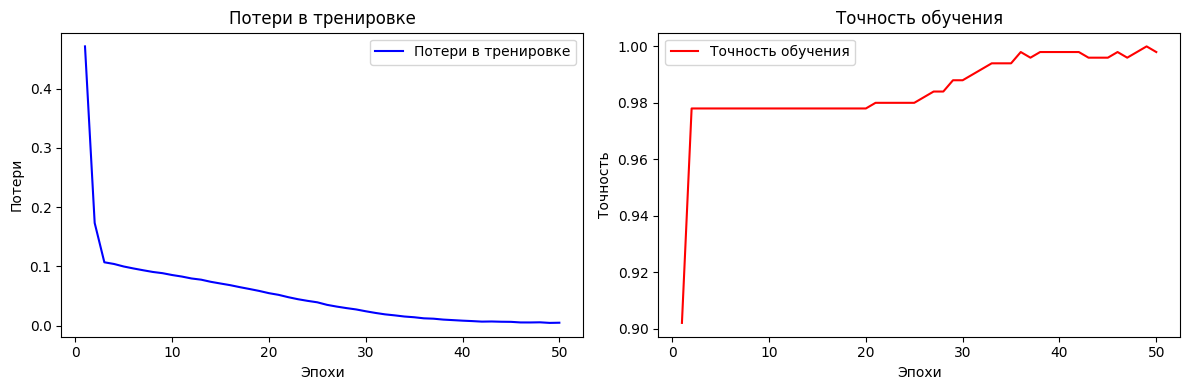

In [ ]:
# Вариант обучения на несбалансированном датасете. Из исходного файла удалены только строки с пустой разметкой
# Предварительно выполнены: Загрузка и предобработка данных
# x_train - входные данные (табличные параметры из резюме)
# y_train - выходные данные (оценка пригодности)

# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(63,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_Train_01, y_Train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_Train_01, y_Train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)


В этом примере последний слой имеет один нейрон и функцию активации сигмоид.

Модель компилируется с оптимизатором 'adam', функцией потерь 'binary_crossentropy' (так как у нас два класса: "да" и "нет") и метрикой точности (accuracy).

Модель обучается на данных x_train и y_train в течение 50 эпох с размером пакета 32. Обученная модель оценивается на тех же данных для вычисления значения потерь и точности.

##### Проверяю предсказания этой модели

In [ ]:
# Загружаю и готовлю данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('ДатаСет Оценка резюме 581 резюме_только да.xlsx')

In [ ]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

(11, 12)


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df_empty.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df_empty.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df_empty.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df_empty.columns.get_loc('Город')
COL_EMPL        = fixed_df_empty.columns.get_loc('Занятость')
COL_SCHED       = fixed_df_empty.columns.get_loc('График')
COL_EXP         = fixed_df_empty.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df_empty.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df_empty.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df_empty.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df_empty.columns.get_loc('Подходит - да/нет')

In [ ]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой

x_test, y_test = get01Data(fixed_df_empty.values) # В варианте использования функции 1
# x_test, y_test = construct_train_data(fixed_df_empty.values)  # В варианте использования функции 2



In [ ]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 10
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

x_test.shape: (11, 63)
y_test.shape: (11,)
Пример результата векторизации данных в строке n (x_test[n]): [0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Пример результата векторизации данных в строке n (y_test[n]): 1


In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
pred

1/1 [==============================] - 0s 97ms/step


array([[0.9858435 ],
       [0.89623886],
       [0.9797959 ],
       [0.96722704],
       [0.97143686],
       [0.98309654],
       [0.966691  ],
       [0.61753833],
       [0.9392721 ],
       [0.86759543],
       [0.9618388 ]], dtype=float32)

In [ ]:
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


**Все 79 предсказаний отрицательные.**

ГИПОТЕЗА: при соотношении разметок 11/480+ , модель обучилась соответственно. Вероятно, если ДС будет сбалансированным, доля положительных предсказаний будет примерно такой же.

ПОДТВЕРЖДЕНИЕ: Попробовал подать только те 11 строк из тех, что были размечены "да".   Результат предсказания: все 11 положительные
Попробовал подать 16 случайно выбранных строк из тех, что были размечены как "нет". Результат предсказания: все 16 отрицательные.

ВЫВОД:
НС работает правильно.

Попробую вариант обучения этой же модели но на сбалансированном датасете в 23 строки

Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.4439 - accuracy: 0.9020
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9780
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9780
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9780
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9780
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9780
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9780
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.9780
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9780
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9780
Epoch 11/50
16/16 [

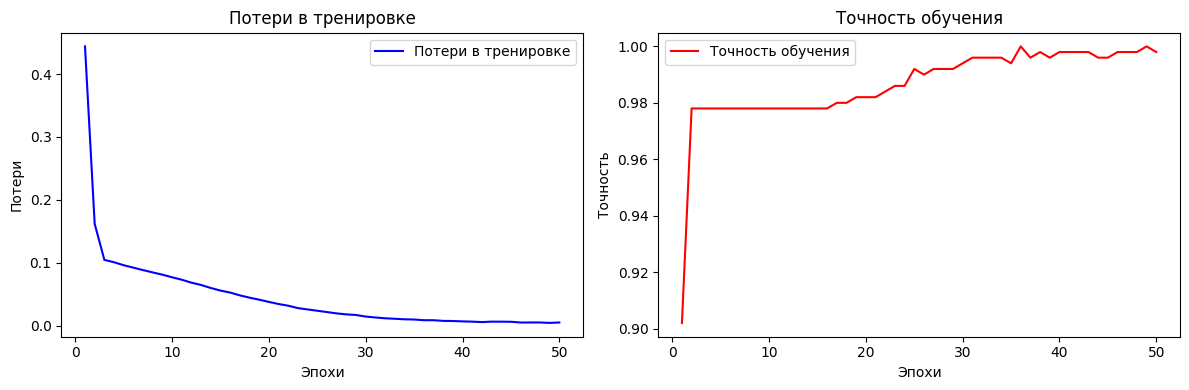

In [ ]:
# Вариант обучения на сбалансированном датасете. Из исходного файла удалены все пустые разметки и разметки с "нет", кроме 12 случайных
# вариантов. Строки перемешаны с "да"


# Создание модели
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(63,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train_02, y_train, epochs=50, batch_size=32)

# Оценка модели
loss, accuracy = model.evaluate(x_train_02, y_train)
print("Потери:", loss)
print("Точность:", accuracy)

# Отрисовка графика истории обучения
plot_training_history(history)

##### Проверяю предсказание этой модели

In [ ]:
# Загружаю и готовлю неразмеченные Заказчиком данные для предсказаний
# Загрузка файла.xlsx
data_pr = pd.read_excel('ДатаСет Оценка резюме 581 резюме_только да.xlsx')

In [ ]:
#Убираю лишние столбцы:
fixed_df_empty = data_pr.drop(data_pr.columns[0],axis = 1)                  # Убираем первый столбец с продублированными индексами. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)     # Убираем первый столбец с датой отклика. Он нам не нужен
fixed_df_empty = fixed_df_empty.drop(fixed_df_empty.columns[0],axis = 1)    # Убираем первый столбец с ФИО. Он нам не нужен
# Вывод количества резюме и числа оставшихся признаков
print(fixed_df_empty.shape)

(11, 12)


In [ ]:
# Убрать кодировку в описаниях \xa0 \n
i=0
for j in range(12):  # Для каждого из столбцов таблицы (их теперь 12)
    for i in range(fixed_df_empty.shape[0]): # По всем резюме
        if type(fixed_df_empty.values[i][j])!=float: # если данные текстовые, то заменяем фрагменты кодировки ASCII на отсутствие символов
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\xa0","")
            fixed_df_empty.values[i][j] = fixed_df_empty.values[i][j].replace("\n"," ") # здесь замена перевода строки на пробел

In [ ]:
# Настройка названий столбцов. Избавляет от зависимости использования номера по порядку в таблице

COL_SEX_AGE     = fixed_df_empty.columns.get_loc('Пол, возраст')
COL_SALARY      = fixed_df_empty.columns.get_loc('ЗП')
COL_POS_SEEK    = fixed_df_empty.columns.get_loc('Ищет работу на должность')
COL_CITY        = fixed_df_empty.columns.get_loc('Город')
COL_EMPL        = fixed_df_empty.columns.get_loc('Занятость')
COL_SCHED       = fixed_df_empty.columns.get_loc('График')
COL_EXP         = fixed_df_empty.columns.get_loc('Опыт ()')
СOL_CUR_PL_WORK = fixed_df.columns.get_loc('Последнее/нынешное место работы')
COL_POS_PREV    = fixed_df_empty.columns.get_loc('Последняя/нынешняя должность')
COL_EDU         = fixed_df_empty.columns.get_loc('Образование и ВУЗ')
COL_UPDATED     = fixed_df_empty.columns.get_loc('Обновление резюме')
СOL_RESULT      = fixed_df_empty.columns.get_loc('Подходит - да/нет')

In [ ]:
# Формирование выборки из загруженного набора данных. Назову ее тестовой
x_test, y_test = construct_train_data(fixed_df_empty.values)

In [ ]:
# Форма наборов параметров и результата
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

# Пример обработанных данных
n = 10
print('Пример результата векторизации данных в строке n (x_test[n]):', x_test[n])
print('Пример результата векторизации данных в строке n (y_test[n]):', y_test[n])

x_test.shape: (11, 63)
y_test.shape: (11,)
Пример результата векторизации данных в строке n (x_test[n]): [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Пример результата векторизации данных в строке n (y_test[n]): 1


In [ ]:
# Проверка работы сети - предсказание на тренировочной выборке
pred = model.predict(x_test)
pred

1/1 [==============================] - 0s 63ms/step


array([[0.9826155 ],
       [0.810813  ],
       [0.9533082 ],
       [0.94519395],
       [0.9460972 ],
       [0.98625904],
       [0.9827126 ],
       [0.6900006 ],
       [0.9690315 ],
       [0.94049305],
       [0.97828364]], dtype=float32)

In [ ]:
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)

print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
sum(predictions)

11

##### Результаты/выводы

До ввода в состав обучающей выборки данных о целевой должности соискателя и после, обученнная модель дает несколько разные результаты:

ДО:

  На несбалансированонм ДС:

     - на новых (неразмеченных Заказчиком) данных: все отрицательные предсказания.

  На сбалансированном ДС в 23 строки:

     - на новых (неразмеченных Заказчиком) данных:
     доля положительных чуть менее половины (36/79), что соотвтетствует соотношению долей положительных и отризательных разметок;

ПОСЛЕ:

  На несбалансированном ДС:

     - на новых данных (неразмеченныз данных):
     все отрицательные предсказания.
     - на заведомо положительных (на входе только "да"): все положительные предсказания.
     - на заведомо отрицательных (на входе только "нет"): все отрицательные предсказания.

  На сбалансированном ДС:

     - на новых данных: доля положительных предсказаний 43/79  (выросла)
     - на заведомо положительных: все положительные (так же)
     - на заведомо отрицательных: 9 положительных из 16 (!).


ВЫВОДЫ:
1. На сбалансированном ДС НС дает пропорционально сбалансированные результаты предсказаний.

2. В состав поданных в НС данных не вошли какие-то, принимаемые Заказчиком во внимание при разметке. Поэтому нужно дополнить входящий вектор ранее не оцифрованными данными для повыщения точности предсказаний.



#### Модель НС для простых текстовых данных

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.1174 - mae: 0.1198 - val_loss: 0.0186 - val_mae: 0.0220
Epoch 2/50
1/1 [==============================] - 0s 199ms/step - loss: 0.1171 - mae: 0.1197 - val_loss: 0.0186 - val_mae: 0.0224
Epoch 3/50
1/1 [==============================] - 0s 148ms/step - loss: 0.1168 - mae: 0.1199 - val_loss: 0.0186 - val_mae: 0.0229
Epoch 4/50
1/1 [==============================] - 0s 206ms/step - loss: 0.1166 - mae: 0.1203 - val_loss: 0.0185 - val_mae: 0.0235
Epoch 5/50
1/1 [==============================] - 0s 193ms/step - loss: 0.1163 - mae: 0.1207 - val_loss: 0.0185 - val_mae: 0.0241
Epoch 6/50
1/1 [==============================] - 0s 198ms/step - loss: 0.1161 - mae: 0.1211 - val_loss: 0.0185 - val_mae: 0.0248
Epoch 7/50
1/1 [==============================] - 0s 84ms/step - loss: 0.1159 - mae: 0.1215 - val_loss: 0.0185 - val_mae: 0.0255
Epoch 8/50
1/1 [==============================] - 0s 83ms/step - loss: 0.1156 - mae: 0.1219 - 

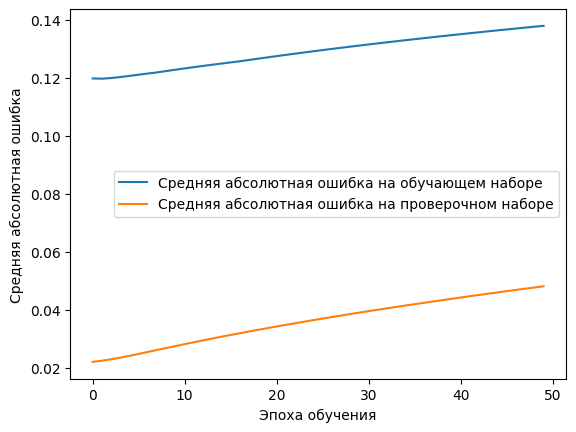

In [ ]:
# Предсказываем пригодность по текущему месту работы и должности
modelTProf = Sequential()
modelTProf.add(Dense(20, activation='relu', input_dim=(xTrainProf01.shape[1]) ) )
modelTProf.add(Dense(500, activation='relu'))
modelTProf.add(Dense(1, activation='linear'))

modelTProf.compile(optimizer=Adagrad(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = modelTProf.fit(xTrainProf01[:17], # В ДС всего 500 резюме. на проверочную отдам 75 или 15%
                    y_train[:17],
                    batch_size=20,
                    epochs=50,
                    #validation_split=0.1,
                    validation_data=(xTrainProf01[17:], y_train[17:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# del xTrainProf01 # Удаление  переменной при риске нехватки памяти (для данного ДС неактуально)

Вывод: при работе с сильно несбалансированным ДС не стоило ожидать чего то путного

На сбалансированном, но малом ДС - переобучение

#### Модель для сложных текстовых данных

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.1189 - mae: 0.1276 - val_loss: 0.0186 - val_mae: 0.0325
Epoch 2/20
1/1 [==============================] - 0s 81ms/step - loss: 0.1138 - mae: 0.1307 - val_loss: 0.0187 - val_mae: 0.0435
Epoch 3/20
1/1 [==============================] - 0s 77ms/step - loss: 0.1076 - mae: 0.1358 - val_loss: 0.0190 - val_mae: 0.0540
Epoch 4/20
1/1 [==============================] - 0s 106ms/step - loss: 0.1045 - mae: 0.1433 - val_loss: 0.0195 - val_mae: 0.0638
Epoch 5/20
1/1 [==============================] - 0s 77ms/step - loss: 0.1010 - mae: 0.1481 - val_loss: 0.0202 - val_mae: 0.0732
Epoch 6/20
1/1 [==============================] - 0s 72ms/step - loss: 0.0958 - mae: 0.1485 - val_loss: 0.0211 - val_mae: 0.0822
Epoch 7/20
1/1 [==============================] - 0s 102ms/step - loss: 0.0946 - mae: 0.1505 - val_loss: 0.0222 - val_mae: 0.0907
Epoch 8/20
1/1 [==============================] - 0s 103ms/step - loss: 0.0873 - mae: 0.1502 - va

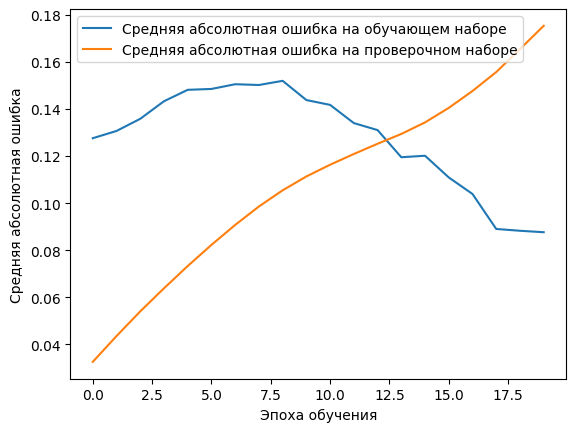

In [ ]:
# Предсказываем пригодность по данным об образовании
# здесь в параметрах maxWordCount = 5000
modelTRez = Sequential()
modelTRez.add(Dense(20, activation='relu',input_dim=(xTrainEduc01.shape[1])))
modelTRez.add(Dense(500, activation='relu'))
modelTRez.add(Dropout(0.3))                             # этим слоем модель отличается от предыдущей
modelTRez.add(Dense(1, activation='linear'))

modelTRez.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = modelTRez.fit(xTrainEduc01[:17],
                    y_train[:17],
                    batch_size=20,
                    epochs=20,
                    validation_data=(xTrainEduc01[17:], y_train[17:]),
                    verbose=1, shuffle=True)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

Вывод: На этом несбалансированном датасете не стоит ожидать путных результатов

На малом количестве данных - переобучение

##### Нейронка по простым данным

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=964

Epoch 1/50
2/2 [==============================] - 2s 334ms/step - loss: 0.4888 - mae: 0.5249 - val_loss: 0.0081 - val_mae: 0.0802
Epoch 2/50
2/2 [==============================] - 0s 76ms/step - loss: 0.1171 - mae: 0.2712 - val_loss: 0.0335 - val_mae: 0.1789
Epoch 3/50
2/2 [==============================] - 0s 79ms/step - loss: 0.1316 - mae: 0.3289 - val_loss: 5.0438e-04 - val_mae: 0.0168
Epoch 4/50
2/2 [==============================] - 0s 64ms/step - loss: 0.0273 - mae: 0.0929 - val_loss: 0.0014 - val_mae: 0.0362
Epoch 5/50
2/2 [==============================] - 0s 82ms/step - loss: 0.0276 - mae: 0.0806 - val_loss: 0.0023 - val_mae: 0.0479
Epoch 6/50
2/2 [==============================] - 0s 73ms/step - loss: 0.0317 - mae: 0.0991 - val_loss: 0.0020 - val_mae: 0.0447
Epoch 7/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0298 - mae: 0.0916 - val_loss: 0.0011 - val_mae: 0.0333
Epoch 8/50
2/2 [==============================] - 0s 62ms/step - loss: 0.0256 - mae: 0.0708 

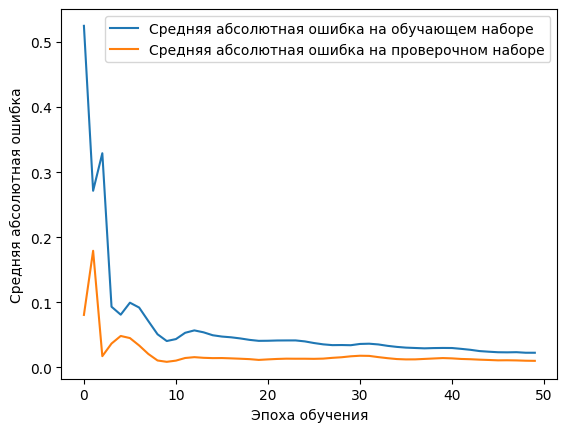

In [ ]:
# Обучаем модель полученными данными
model = Sequential()
model.add(BatchNormalization(input_shape=(x_Train_01.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = model.fit(x_Train_01,
                    y_Train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.015,
                    verbose=1)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()


In [ ]:
# Проверка работы сети - предсказание на "тестовой" выборке
pred = model.predict(x_test)
# Для удобочитаемости:
predictions = pred.flatten()  # Преобразование в одномерный массив
predictions = [1 if p >= 0.5 else 0 for p in predictions]  # Преобразование вероятностей в метки "да" (1) или "нет" (0)
print(pred)
print(predictions)

1/1 [==============================] - 0s 80ms/step
[[ 0.01616378]
 [-0.00095114]
 [ 0.00820936]
 [-0.00791627]
 [ 0.01967752]
 [ 0.0262271 ]
 [ 0.00461173]
 [-0.00832919]
 [ 0.03762466]
 [ 0.00236305]
 [-0.00287258]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = model.predict(x_Train_01)
pred = pred.flatten()
# Среднее значение ошибки
delta = pred - y_Train
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16/16 [==============================] - 0s 3ms/step
0.023132387120160275


In [ ]:
# В качестве нормализации данных используем готовую библиотеку
yScaler = StandardScaler()

# Скармливаем объекту двумерный вектор
yScaler.fit(y_Train.reshape(-1, 1))

# Нормализуем по нормальному распределению
yTrainScaled = yScaler.transform(y_Train.reshape(-1, 1))

print(yTrainScaled.shape)
print(y_Train[1])
print(yTrainScaled[1])

(500, 1)
1
[6.6674242]


In [ ]:
print(min(y_Train), max(y_Train))
print(min(yTrainScaled), max(yTrainScaled))

0 1
[-0.14998296] [6.6674242]


Epoch 1/50
7/7 - 1s - loss: 0.9584 - mae: 0.3544 - val_loss: 1.7750 - val_mae: 0.5483 - 1s/epoch - 190ms/step
Epoch 2/50
7/7 - 0s - loss: 0.8147 - mae: 0.3754 - val_loss: 1.8503 - val_mae: 0.3410 - 96ms/epoch - 14ms/step
Epoch 3/50
7/7 - 0s - loss: 0.6784 - mae: 0.3423 - val_loss: 1.8254 - val_mae: 0.4192 - 86ms/epoch - 12ms/step
Epoch 4/50
7/7 - 0s - loss: 0.5936 - mae: 0.2746 - val_loss: 1.8282 - val_mae: 0.4476 - 92ms/epoch - 13ms/step
Epoch 5/50
7/7 - 0s - loss: 0.4567 - mae: 0.2425 - val_loss: 1.8265 - val_mae: 0.4288 - 98ms/epoch - 14ms/step
Epoch 6/50
7/7 - 0s - loss: 0.4216 - mae: 0.2839 - val_loss: 1.8374 - val_mae: 0.4009 - 86ms/epoch - 12ms/step
Epoch 7/50
7/7 - 0s - loss: 0.3208 - mae: 0.2544 - val_loss: 1.7903 - val_mae: 0.4647 - 87ms/epoch - 12ms/step
Epoch 8/50
7/7 - 0s - loss: 0.2730 - mae: 0.2639 - val_loss: 1.8311 - val_mae: 0.3798 - 92ms/epoch - 13ms/step
Epoch 9/50
7/7 - 0s - loss: 0.2085 - mae: 0.2214 - val_loss: 1.8054 - val_mae: 0.4363 - 96ms/epoch - 14ms/step
Ep

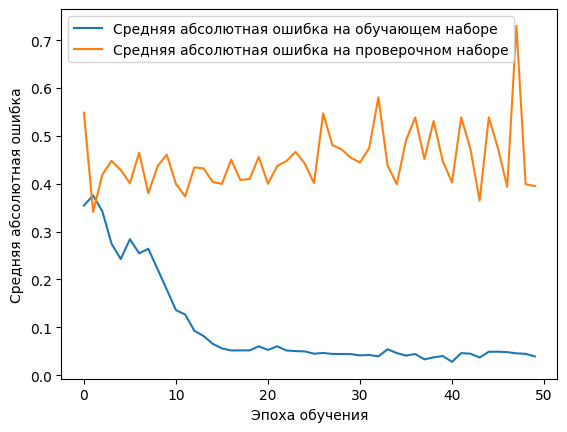

In [ ]:
# Обучаем модель стандартизированными данными
modelS = Sequential()
modelS.add(BatchNormalization(input_shape=(x_Train_01.shape[1],)))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(1000, activation='tanh'))
modelS.add(Dense(100, activation='relu'))
modelS.add(Dense(1, activation='linear'))

modelS.compile(optimizer=Adam(lr=1e-5), loss='mse', metrics=['mae'])

history = modelS.fit(x_Train_01,
                    yTrainScaled,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.15,
                    verbose=2)

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

In [ ]:
# Делаем предсказание и приводим его к начальному виду
pred = modelS.predict(x_Train_01)
predUnscaled = yScaler.inverse_transform(pred).flatten()

# Среднее значение ошибки
delta = predUnscaled - y_Train
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

16/16 [==============================] - 0s 3ms/step
0.012601174105167956


##### Оценка результатов

*Разбор данного раздела:* https://youtu.be/h8cOCvlYmN8?t=1314



In [ ]:
yy = model.predict(x_Train_01) # Результат для всего тренировочного набора

16/16 [==============================] - 0s 2ms/step


In [ ]:
n = 10
for i in range(n):
  print('Реальное значение - ',y_Train[i], " Предсказанное значение - ", yy[i][0], " Разница - ", abs(y_Train[i]-yy[i][0]))

Реальное значение -  0  Предсказанное значение -  -0.0030977952  Разница -  0.003097795182839036
Реальное значение -  1  Предсказанное значение -  0.25880614  Разница -  0.7411938607692719
Реальное значение -  0  Предсказанное значение -  -0.007530047  Разница -  0.007530047092586756
Реальное значение -  0  Предсказанное значение -  -0.0061092344  Разница -  0.006109234411269426
Реальное значение -  0  Предсказанное значение -  -0.0038098188  Разница -  0.0038098187651485205
Реальное значение -  0  Предсказанное значение -  -0.0060329046  Разница -  0.006032904610037804
Реальное значение -  0  Предсказанное значение -  -0.0030444104  Разница -  0.003044410375878215
Реальное значение -  0  Предсказанное значение -  -0.001094721  Разница -  0.0010947210248559713
Реальное значение -  0  Предсказанное значение -  0.00057013036  Разница -  0.0005701303598470986
Реальное значение -  0  Предсказанное значение -  0.002486852  Разница -  0.0024868519976735115


Примерный план подготовительных шагов в подготовке данных для обучения модели:

1. Задать понятные названия столбцам для использования в коде без индексов.

2. Предобработка данных: Проверить данные на наличие пропущенных значений и выбросов. Может потребоваться заполнить пропущенные значения или удалить аномальные данные. Также может потребоваться выполнить масштабирование или нормализацию признаков, чтобы обеспечить стабильность обучения модели.

3. Разделение на тренировочный и тестовый наборы. Обычно используется отношение 80/20 или 70/30.

4. Кодирование целевой переменной: Поскольку целевая переменная ("подходит" или "не подходит") представлена в виде текстовых меток, потребуется кодирование для преобразования ее в числовой формат. Например, можно присвоить числу 1 для "подходит" и числу 0 для "не подходит".

5. Обработка дисбаланса классов: Исходная БД очень несбалансирована. Возможно, боевая будет получше. Если нет, потребуется изучить и, возможно,  применить методы балансировки классов, такие как взвешивание классов или аугментация текстовых/табличных данных, чтобы предотвратить смещение модели в сторону преобладающего класса.

6. Гиперпараметры и кросс-валидация: Нужно определить оптимальные значения гиперпараметров модели, такие как количество нейронов, количество слоев, скорость обучения и другие. Нужно изучить и попробовать использовать методы кросс-валидации для оценки производительности модели на различных подмножествах данных и выбора лучших параметров.

7. Проверка настройки модели в соответствии с требованиями к точности предсказаний и обработанными данными перед началом обучения на обещанных боевых данных от Заказчика.

8. Сборка фрейма предобработки данных от Заказчика для подачи на обучение модели и для дообучения на новых данных, поступающих от заказчика в будущем

## Составная НС

Пробую собрать связку из 3 НС:
 - НС для работы с табличными данными по соискателю (вход 1)
 - НС для работы с текстом об текущем месте работы (вход 2)
 - НС для рабты с текстом об образовании (вход 3)



---



In [ ]:
# Построение составной модели. Вариант 1 (молель из практического ноутбука курса)

input1 = Input((x_train_02.shape[1],))  # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input((xTrainProf01.shape[1],))  # обучающая выборка по тестовым данным об текущем месте работы
input3 = Input((xTrainEduc01.shape[1],))  # обучающая выборка по текстовым данным об образовании

x1 = BatchNormalization()(input1)  # Создаем ветку х1
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation="relu")(x1)

x2 = BatchNormalization()(input2)  # Создаем ветку х2
x2 = Dense(25, activation="relu")(x2)
x2 = Dense(8, activation="tanh")(x2)
x2 = Dense(5, activation="elu")(x2)

x3 = BatchNormalization()(input3)  # Создаем ветку х3
x3 = Dense(1000, activation="tanh")(x3)
x3 = Dense(20, activation="elu")(x3)
x3 = Dense(5, activation="elu")(x3)

x = concatenate([x1, x2, x3])  # Объединяем все три ветки

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)  # Финальный нейрон, делает регрессию

model = Model(inputs=[input1, input2, input3], outputs=x)  # В Model загружаем стартовые и последнюю точки

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

history = model.fit(
    [x_train_02[:17], xTrainProf01[:17], xTrainEduc01[:17]],  # первые 425/17 строк ДС
    y_train[:17],
    epochs=80,
    validation_data=(
        [x_train_02[17:], xTrainProf01[17:], xTrainEduc01[17:]],  # последние 75/6 строк
        y_train[17:]
    ),
    verbose=1,
    shuffle=True
)


Epoch 1/80
1/1 [==============================] - 3s 3s/step - loss: 0.1444 - mae: 0.2150 - val_loss: 0.0189 - val_mae: 0.0530
Epoch 2/80
1/1 [==============================] - 0s 410ms/step - loss: 0.1270 - mae: 0.2053 - val_loss: 0.0225 - val_mae: 0.0886
Epoch 3/80
1/1 [==============================] - 0s 413ms/step - loss: 0.1895 - mae: 0.2458 - val_loss: 0.0262 - val_mae: 0.1075
Epoch 4/80
1/1 [==============================] - 0s 408ms/step - loss: 0.1410 - mae: 0.2275 - val_loss: 0.0242 - val_mae: 0.0894
Epoch 5/80
1/1 [==============================] - 0s 410ms/step - loss: 0.0368 - mae: 0.0991 - val_loss: 0.0216 - val_mae: 0.0729
Epoch 6/80
1/1 [==============================] - 0s 404ms/step - loss: 0.0401 - mae: 0.1435 - val_loss: 0.0202 - val_mae: 0.0632
Epoch 7/80
1/1 [==============================] - 0s 409ms/step - loss: 0.0380 - mae: 0.1132 - val_loss: 0.0192 - val_mae: 0.0558
Epoch 8/80
1/1 [==============================] - 0s 286ms/step - loss: 0.0312 - mae: 0.1156 

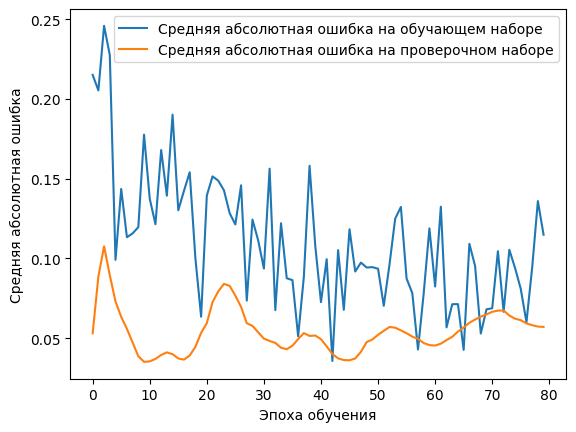

In [ ]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## А не попробовать ли Auto ML?
Конкретно AutoKeras?

In [ ]:
!pip install autokeras
import autokeras as ak

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.7/527.7 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 111.2 MB/s eta 0:00:00


In [ ]:
# Вариант 1. В данном коде используется AutoKeras для задачи классификации структурированных данных из табличного ДС. Настройки по-умолчанию.
# tuner = greedy
# max_trials=50

# Преобразование данных в объект tf.data.Dataset. Создается tf.data.Dataset для входных данных x_train_02 и меток y_train с помощью метода from_tensor_slices.
# Это понадобилось из-за проблемы в ошибке разделения данных на обучающую и валидационную выборки.
# Вместо использования x_train_02 напрямую, необходимо создать tf.data.Dataset объект для обучающей выборки и передать его в метод fit.
x_train_02_dataset = tf.data.Dataset.from_tensor_slices(x_train_02)
y_train_dataset = tf.data.Dataset.from_tensor_slices(y_train)
dataset = tf.data.Dataset.zip((x_train_02_dataset, y_train_dataset)) # Создается объединенный датасет dataset путем объединения входных
# данных и меток с помощью метода zip.

# Разделение данных на обучающую и валидационную выборки
validation_split = 0.2                      # Задается коэффициент validation_split для определения размера валидационной выборки.
num_instances = len(x_train_02)             # Количество образцов в валидационной выборке рассчитывается на основе общего числа образцов и коэффициента разделения.
num_validation_samples = int(validation_split * num_instances)

# Создаются датасеты train_dataset и val_dataset с помощью методов skip и take соответственно.train_dataset содержит обучающие данные после пропуска
# валидационных образцов, а val_dataset содержит валидационные образцы.
train_dataset = dataset.skip(num_validation_samples)
val_dataset = dataset.take(num_validation_samples)

# Создается экземпляр класса StructuredDataClassifier из AutoKeras. Указываются параметры overwrite=True для перезаписи существующей модели, max_trials=50
# для максимального числа попыток поиска модели и metrics=['accuracy'] для использования метрики точности в качестве критерия оценки моделей.
clf = ak.StructuredDataClassifier(
    overwrite=True,
    max_trials=50,
    metrics=['accuracy'])
# Метод fit вызывается с использованием train_dataset в качестве обучающих данных, epochs=100 для числа эпох обучения и validation_data=val_dataset
# для валидационных данных.
clf.fit(
    x=train_dataset,
    epochs=100,
    validation_data=val_dataset)


Trial 50 Complete [00h 00m 23s]
val_accuracy: 0.9599999785423279

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 24m 51s
Epoch 1/100
13/13 [==============================] - 3s 66ms/step - loss: 1.1316 - accuracy: 0.1800 - val_loss: 498178.8438 - val_accuracy: 0.0400
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.9303 - accuracy: 0.2875 - val_loss: 410189.9062 - val_accuracy: 0.1300
Epoch 3/100
13/13 [==============================] - 0s 15ms/step - loss: 0.7696 - accuracy: 0.4525 - val_loss: 335608.8438 - val_accuracy: 0.2500
Epoch 4/100
13/13 [==============================] - 0s 20ms/step - loss: 0.6403 - accuracy: 0.6850 - val_loss: 269464.4688 - val_accuracy: 0.3300
Epoch 5/100
13/13 [==============================] - 0s 20ms/step - loss: 0.5375 - accuracy: 0.8375 - val_loss: 213505.0938 - val_accuracy: 0.4800
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.4556 - accuracy: 0.9175 - val_loss: 167828.015

В результате запуска кода выше:
Через 28 мин получена архитектура НС, дающая точность на проверочной выборке 98%%.
НС -  небольшая, имеет 3.26 тыс параметров:



In [ ]:
# чтобы получить num_models лучших моделей в этом варианте настроек:
best_models1 = clf.tuner.get_best_models (num_models = 3)

In [ ]:
best_models1[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 63)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 63)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 63)               127       
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                2048      
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

In [ ]:
# Оцениваем лучшую модель на проверочной выборке
val_acc = clf.evaluate(x=val_dataset)
print("Точность на проверочных данных:", val_acc)


4/4 [==============================] - 1s 6ms/step - loss: 0.1767 - accuracy: 0.9600
Точность на проверочных данных: [0.17670370638370514, 0.9599999785423279]


In [ ]:
# Вариант 2. Попробуем другой тюнер: bayesian. Поменьше триалов и эпох.
# Этот тюнер будет использовать более интеллектуальные методы для выбора следующего набора гиперпараметров,
# основываясь на предыдущих прогонках. Он может дать лучшие результаты, чем простой greedy тюнер.
clf2 = ak.StructuredDataClassifier(
    overwrite = True, multi_label = False,
    max_trials = 50, loss = 'binary_crossentropy',
    metrics = ['accuracy'], seed=88, max_model_size = None,
    tuner = 'bayesian', objective = 'val_accuracy'
)
clf2.fit(
    x = train_dataset,
    epochs=100,
    validation_data = val_dataset)

Trial 50 Complete [00h 00m 49s]
val_accuracy: 0.9599999785423279

Best val_accuracy So Far: 0.9700000286102295
Total elapsed time: 00h 27m 55s
Epoch 1/100
13/13 [==============================] - 3s 71ms/step - loss: 1.0461 - accuracy: 0.3250 - val_loss: 30288.5879 - val_accuracy: 0.3600
Epoch 2/100
13/13 [==============================] - 0s 16ms/step - loss: 1.0101 - accuracy: 0.3475 - val_loss: 32915.3828 - val_accuracy: 0.3600
Epoch 3/100
13/13 [==============================] - 0s 19ms/step - loss: 1.0438 - accuracy: 0.3150 - val_loss: 35396.7617 - val_accuracy: 0.3700
Epoch 4/100
13/13 [==============================] - 0s 16ms/step - loss: 1.0281 - accuracy: 0.3450 - val_loss: 37726.7734 - val_accuracy: 0.3800
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 1.0211 - accuracy: 0.3725 - val_loss: 39799.1914 - val_accuracy: 0.4100
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 1.0028 - accuracy: 0.3550 - val_loss: 41489.7148 - va

При датасете в 500 строк.
В результате за 25 мин подобрана НС с точностью 91 % на проверочной выборке.
НС еще меньше, всего 1 тыс параметров.


Тот же датасет в 500 строк, но с перемешанными данными разметки дал несколько другой результат: за 28 мин подобрана НС с точновстью предсказаний на проверочной выборке в 97%. Моделт имеет 146 тыс параметром



In [ ]:
# чтобы получить num_models лучших моделей в этом варианте настроек:
best_models2 = clf2.tuner.get_best_models (num_models = 3)

In [ ]:
best_models2[0].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 63)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 63)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 63)               127       
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               8192      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                             

In [ ]:
# Оцениваем лучшую модель на проверочной выборке
val_acc = clf2.evaluate(x=val_dataset)
print("Точность на проверочных данных:", val_acc)


4/4 [==============================] - 1s 8ms/step - loss: 0.2339 - accuracy: 0.9600
Точность на проверочных данных: [0.23387886583805084, 0.9599999785423279]






При сбалансированном, но маленьком датасетет в 23 строки,
Оценка дала результат только в 50% (!!!). При этом во время обучения получена точность в 100%

Это несоответствие так пояснил CGPT:

Результаты, которые вы видите, указывают на то, что во время обучения лучшая модель достигла точности 100% на проверочных данных (val_accuracy равен 1.0). Однако, при оценке модели на проверочной выборке (val_dataset), точность составила всего 50%.

Это может быть связано с различными факторами. Например, модель может быть переобучена на обучающих данных и не обобщать хорошо на новые данные. Также возможно, что валидационная выборка не является представительной и не отражает характеристики тестовых данных.

Рекомендуется проверить данные, убедиться, что они правильно подготовлены и соответствуют ожиданиям. Также можно попробовать различные модели, архитектуры или подходы к обучению, чтобы улучшить результаты.

Также стоит отметить, что использование автоматического подбора архитектуры модели с помощью AutoKeras не всегда гарантирует получение наилучшей модели. Он может помочь в исследовании различных архитектур и параметров, но дополнительные настройки и оптимизации могут потребоваться для достижения оптимальных результатов.

In [ ]:
# Доработанный код составной модели (Вариант 2):

from imblearn.over_sampling import RandomOverSampler

# Применение oversampling для балансировки выборки
oversampler = RandomOverSampler(random_state=42)

x_resampled_tab_02, y_resampled_tab_02 = oversampler.fit_resample(x_train_02, y_train)
x_resampled_txt_Prof, y_resampled_txt_Prof = oversampler.fit_resample(xTrainProf01, y_train)
x_resampled_txt_Educ, y_resampled_txt_Educ = oversampler.fit_resample(xTrainEduc01, y_train)

In [ ]:
# Чтобы убедиться, что размерности данных и целевых значений совпадают, и они готовы для использования в обучении модели:

print(x_resampled_tab_02.shape)  # Размерность данных x_resampled_tab_02
print(y_resampled_tab_02.shape)  # Размерность целевых значений y_resampled_tab_02

print(x_resampled_txt_Prof.shape)  # Размерность данных x_resampled_txt_Prof
print(y_resampled_txt_Prof.shape)  # Размерность целевых значений y_resampled_txt_Prof

print(x_resampled_txt_Educ.shape)  # Размерность данных x_resampled_txt_Educ
print(y_resampled_txt_Educ.shape)  # Размерность целевых значений y_resampled_txt_Educ


(978, 63)
(978,)
(978, 10000)
(978,)
(978, 5000)
(978,)


In [ ]:
# теперь составная модель:

# Создание входных слоев
input1 = Input((x_resampled_tab_02.shape[1],))    # обучающая выборка по табличным данным в варианте сборки вектора № 2
input2 = Input((x_resampled_txt_Prof.shape[1],))  # обучающая выборка по тестовым данным об текущем месте работы
input3 = Input((x_resampled_txt_Educ.shape[1],))  # обучающая выборка по текстовым данным об образовании

# Ветка х1
x1 = BatchNormalization()(input1)
x1 = Dropout(0.5)(x1)
x1 = Dense(10, activation="relu")(x1)
x1 = Dense(1000, activation="relu")(x1)
x1 = Dense(100, activation="relu")(x1)

# Ветка х2
x2 = BatchNormalization()(input2)
x2 = Dense(25, activation="relu")(x2)
x2 = Dense(8, activation="tanh")(x2)
x2 = Dense(5, activation="elu")(x2)

# Ветка х3
x3 = BatchNormalization()(input3)
x3 = Dense(1000, activation="tanh")(x3)
x3 = Dense(20, activation="elu")(x3)
x3 = Dense(5, activation="elu")(x3)

# Объединение всех трех веток
x = concatenate([x1, x2, x3])

x = Dense(15, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='linear')(x)  # Финальный нейрон, делает регрессию

# Создание модели
model = Model(inputs=[input1, input2, input3], outputs=x)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=['mae'])

# Определение обратных вызовов:
# EarlyStopping с параметром patience=10 и монитором val_loss. Этот колбэк останавливает обучение, если
# значение функции потерь на проверочной выборке не улучшается в течение 10 эпох:
# early_stopping = EarlyStopping(patience=10, monitor='val_loss', restore_best_weights=True)
# ModelCheckpoint с параметром save_best_only=True и монитором val_loss. Этот колбэк в сохраняет только
# лучшую модель на основе значения функции потерь на проверочной выборке:
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
# ReduceLROnPlateau с параметрами factor=0.1, patience=5 и монитором val_loss. Этот колбэк  уменьшает скорость
# обучения на 10% в случае, если значение функции потерь на проверочной выборке не улучшается в течение 5 эпох:
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss')
# Обучение модели с использованием обратных вызовов

# !!! При передаче целевых значений в функцию model.fit, необходимо объединить их в список, так как функция model.fit ожидает
# один список для целевых значений:

history = model.fit(
    [x_resampled_tab_02[:782], x_resampled_txt_Prof[:782], x_resampled_txt_Educ[:782]],  # первые 782/425/17 строк ДС после oversampling
    [y_resampled_tab_02[:782], y_resampled_txt_Prof[:782], y_resampled_txt_Educ[:782]],  # Используем сбалансированные целевые значения
    epochs=80,
    validation_data=(
        [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:]],  # последние х/75/6 строк после oversampling
        [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:]]  # Используем сбалансированные целевые значения
    ),
    verbose=1,
    shuffle=True,
  # callbacks=[early_stopping, model_checkpoint, reduce_lr]
    callbacks=[model_checkpoint, reduce_lr]                      # выключенный колбэк
)

Epoch 1/80
25/25 [==============================] - 3s 64ms/step - loss: 0.2001 - mae: 0.3156 - val_loss: 0.4725 - val_mae: 0.6838 - lr: 0.0010
Epoch 2/80
25/25 [==============================] - 1s 55ms/step - loss: 0.1237 - mae: 0.2349 - val_loss: 0.3419 - val_mae: 0.5828 - lr: 0.0010
Epoch 3/80
25/25 [==============================] - 1s 57ms/step - loss: 0.1121 - mae: 0.2190 - val_loss: 0.0787 - val_mae: 0.2519 - lr: 0.0010
Epoch 4/80
25/25 [==============================] - 1s 48ms/step - loss: 0.1080 - mae: 0.2090 - val_loss: 0.4042 - val_mae: 0.6224 - lr: 0.0010
Epoch 5/80
25/25 [==============================] - 2s 80ms/step - loss: 0.0821 - mae: 0.1817 - val_loss: 0.2046 - val_mae: 0.4342 - lr: 0.0010
Epoch 6/80
25/25 [==============================] - 1s 57ms/step - loss: 0.0772 - mae: 0.1778 - val_loss: 0.0505 - val_mae: 0.2109 - lr: 0.0010
Epoch 7/80
25/25 [==============================] - 1s 54ms/step - loss: 0.0629 - mae: 0.1625 - val_loss: 0.0455 - val_mae: 0.2013 - lr:

Комментарий к коду выше:

Здесь добавлено сэмплирование данных с использованием метода RandomOverSampler, чтобы сбалансировать датасет. Цель - учить модель на примерно равном количестве примеров положительного и отрицательного классов.

При переработке исходного кода для составной модели выполнены следующие шаги:

Импорт класса RandomOverSampler из модуля imblearn.over_sampling (добавлен и в сборник библиотек).

Применение oversampling к обучающей выборке, вызывая fit_resample у RandomOverSampler. Цель - сбалансированный набор данных, в котором положительные и отрицательные примеры будут иметь примерно одинаковое количество.

Используем сбалансированный набор данных X_resampled и y_resampled вместо исходных x_train и y_train в вызове model.fit.

При определении входных слоев и их веток изменений нет.

Т.о, этот код учитыввет несбалансированность данных путем применения oversampling и использования сбалансированного набора данных для обучения модели.

Надеюсь, это поможет достичь более взвешенной оценки производительности модели на обоих классах.

Далее планирую заменить ветку обработки категоризированных данных на модель, предложенную AutoKeras

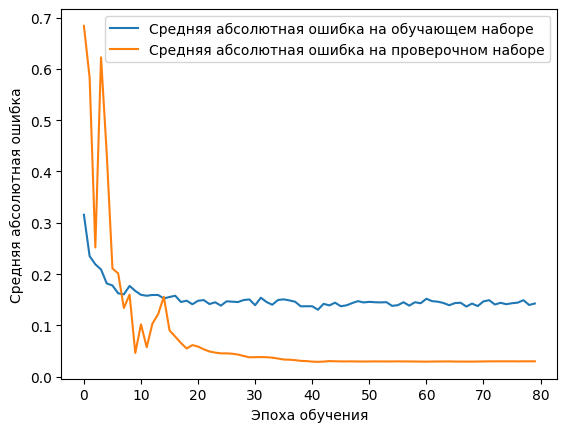

In [ ]:
# Визуализация результатов обучения

plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

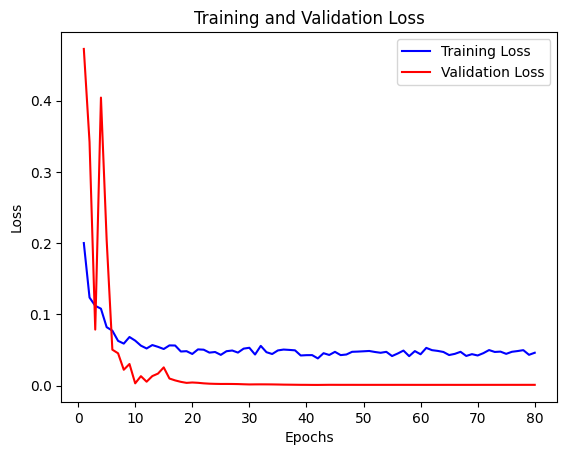

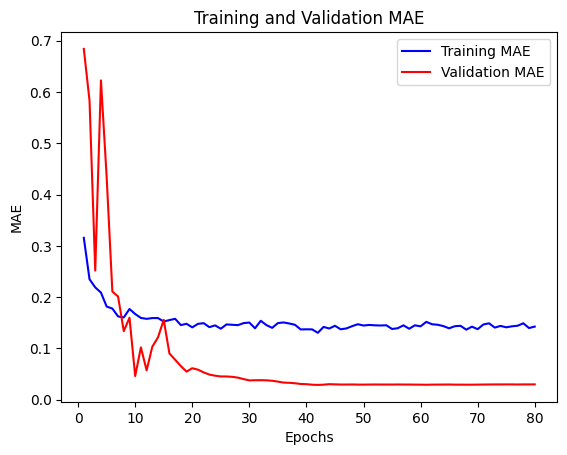

In [ ]:
# Визуализация подробнее:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']

epochs = range(1, len(loss_values) + 1)

# График функции потерь
plt.figure()
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График метрики MAE
plt.figure()
plt.plot(epochs, mae_values, 'b', label='Training MAE')
plt.plot(epochs, val_mae_values, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


ВЫВОД по обучаемости модели:
Вполне себе обучается. Колбек EarlyStopping с параметром patience=10 и монитором val_loss прерывает обучение на 45 эпохе. С выключенным колбэком достигаем заданной 80 эпохи.

In [ ]:
# Оценка модели на проверочной выборке
val_loss, val_mae = model.evaluate(
    [x_resampled_tab_02[782:], x_resampled_txt_Prof[782:], x_resampled_txt_Educ[782:]],
    [y_resampled_tab_02[782:], y_resampled_txt_Prof[782:], y_resampled_txt_Educ[782:]]
)
print("Loss на проверочных данных:", val_loss)
print("MAE на проверочных данных:", val_mae)


7/7 [==============================] - 0s 14ms/step - loss: 0.0012 - mae: 0.0300
Loss на проверочных данных: 0.0012239430798217654
MAE на проверочных данных: 0.03001313842833042


## Возврат предсказания в тестовый датасет Заказчика для сопоставления


Для добавления колонки "оценка резюме" с процентным распределением вероятностей между классами "подходит" и "не подходит" в тестовый датасет, можно воспользоваться следующим кодом:

In [ ]:
# Получение предсказаний модели на тестовых данных.
# Предполагается, что тестовые данные составят файл test_dataset c такой же структурой данных, как и исходный.

predictions = model.predict([x_test_02, xTestProf01, xTestEduc01])  # тестовые данные должны пройти ту же предобработку
                                                                    # с делением на три выборки
# Вычисление процентного распределения вероятностей
percentage = predictions * 100

# Формирование колонки "оценка резюме" в формате "подходит % / не подходит %"
evaluation = []
for p in percentage:
  if p >= 50 :
    evaluation.append(f"подходит {p:.2f}%")
  else:
    evaluation.append(f"НЕ подходит {100 - p:.2f}%")

# Добавление колонки "оценка резюме" в тестовый датасет
test_dataset['оценка резюме НС'] = evaluation

# Экспорт тестового датасета в CSV-файл
test_dataset.to_csv('test_dataset_with_evaluation.csv', index=False) #  Параметр index=False указывает, что индексы строк не должны быть
# включены в выходной CSV-файл.

# Сохранение прогнозов в CSV-файл
output_df = pd.DataFrame({"ID": test_ids, "Prediction": predictions.flatten()})
output_df.to_csv("predictions.csv", index=False)


Этим кодом сначала получаем предсказания модели на тестовых данных. Затем вычисляем процентное распределение вероятностей, умножая предсказания на 100. Далее, формируем колонку "оценка резюме" в формате "подходит % / не подходит %" для каждого предсказания. Затем, добавляем эту колонку в тестовый датасет.

Внимание!  Предполагаем, что от Заказчика получен тестовый датасет - файл с названием "test_datase" форматом  = исходному и который мы дополняем  новой колонкой "оценка резюме НС".

In [ ]:
# посмотрим, как выглядит результат
output_df.head(3)

In [ ]:
# посмотрим, как выглядит результат
test_dataset.head(3)